In [3]:
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
import re
import string
import numpy as np 
import random
import pandas as pd 
from collections import Counter
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import itertools
from sklearn.metrics import confusion_matrix, f1_score, recall_score,precision_score, accuracy_score, roc_curve, auc,classification_report
import statistics
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, f1_score, recall_score,precision_score, accuracy_score, roc_curve, auc,classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                        #   title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return ""

In [4]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

# Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(
        'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
        '', 
        text
    )
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    text = remove_url(text)
    text = remove_emoji(text)
    text = remove_html(text)
    
    return text


from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
st = nltk.PorterStemmer()
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords
lm = nltk.WordNetLemmatizer()



def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    # text = [st.stem(word) for word in text]
    # text = [lm.lemmatize(word) for word in text]
    
    return text

drop_col= ['Unnamed: 0', 'no_char', 'URLs', 'URL Count', 'User','Full_Text', 'Date created', 'Shortining_Service', 'double_slash_redirecting', 'URL_Length',
           'SSLfinal_State', 'port', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Links_pointing_to_page', 'Statistical_report', 'URL','Domain length', 'port','intent_bertweet']


In [5]:
Tweet_data1 = pd.read_csv("add directory here.csv")

In [6]:
#Preprocessing
import pandas as pd
import random

def select_samples_randomized(df, label_column, labels_to_select, num_samples_per_label=2000):
    selected_samples = pd.DataFrame()

    for label in labels_to_select:
        label_samples = df[df[label_column] == label]
        if len(label_samples) <= num_samples_per_label:
            selected_samples = pd.concat([selected_samples, label_samples])
        else:
            selected_samples = pd.concat([selected_samples, label_samples.sample(n=num_samples_per_label, random_state=1)])

    return selected_samples

data = Tweet_data1

dff = data[data["Tweet_Label"] != 0]
d1 = data[data["Tweet_Label"] != 0]
d2 = data[data["Tweet_Label"] == 0]

cols_to_adjust = ['account_age', 'Follower Count', 'Following Count',
       'User Favourite Count', 'no_lists']
#noTweet

dff = dff[['account_age', 'Follower Count', 'Following Count',
       'User Favourite Count', 'no_lists']]
#noTweet
np.random.seed(42)


for j,i in enumerate(dff.columns):
    if dff[i].dtype.kind == 'i':
        count = 0
        for row in dff[i].values:
            x = np.random.randint(-5,5)
            val = row+x
            
            if val <0 :
                x = np.random.randint(0,3)
                val = row+x
            dff.iloc[count,j] = val
            count = count+1

d1[cols_to_adjust] = dff[cols_to_adjust].values
data = d2.append(d1)

data = select_samples_randomized(data.drop(columns=drop_col).drop_duplicates(), 'Tweet_Label', [0, 1, 2], num_samples_per_label=2000)
# data.Tweet_Label.value_counts()

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2999833171.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[cols_to_adjust] = dff[cols_to_adjust].values
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2999833171.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = d2.append(d1)


In [7]:
data

,Message Lenght,account_age,Follower Count,Following Count,User Favourite Count,no_lists,noTweet,Retweet Count,no_hashtag,no_mentions,...,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,subjectivity,polarity,sentiment_label,TFIDF,check_connection
583,109.0,5012,803,2327,1162,17,325,0,1,0,...,-1,-1,-1,-1,-1,0.602395,0.204791,Positive,0.000373,-1
6152,130.0,3973,1723,161,3,99,1134694,0,2,0,...,-1,-1,-1,-1,-1,0.522619,0.045238,Positive,0.000425,-1
783,140.0,1758,2879,1078,1739,0,7423,0,0,0,...,-1,-1,1,-1,-1,0.528606,0.057213,Positive,0.000329,-1
2988,86.0,2754,27,86,401,0,1008,0,0,1,...,1,1,0,0,-1,0.441182,-0.117635,Negative,0.000324,-1
7125,137.0,117,574,413,22498,2,29953,1,2,0,...,1,1,0,0,-1,0.586844,0.173688,Positive,0.000328,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,124.0,5011,1124,954,6178,23,211561,0,1,4,...,1,1,1,1,-1,0.491669,-0.016663,Negative,0.000220,1
4378,122.0,833,710,538,19,17,161798,1,1,1,...,1,1,1,1,-1,0.401458,-0.197083,Negative,0.000392,1
3770,135.0,96,8873,57,2,2,3565,1,4,0,...,1,-1,1,1,-1,0.457285,-0.085429,Negative,0.000266,1
6436,134.0,1243,2573,595,905,63,27132,0,1,0,...,-1,-1,-1,-1,-1,0.518638,0.037276,Positive,0.000261,-1


In [8]:
data.columns

Index(['Message Lenght', 'account_age', 'Follower Count', 'Following Count',
       'User Favourite Count', 'no_lists', 'noTweet', 'Retweet Count',
       'no_hashtag', 'no_mentions', 'no_urls', 'no_digit',
       'Tweet Favourite Count', 'Tweet_Label', 'having_IP_Address',
       'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
       'Domain_registeration_length', 'Favicon', 'HTTPS_token', 'Request_URL',
       'URL_of_Anchor', 'Redirect', 'on_mouseover', 'RightClick',
       'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic',
       'Page_Rank', 'Google_Index', 'subjectivity', 'polarity',
       'sentiment_label', 'TFIDF', 'check_connection'],
      dtype='object')

In [9]:
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold

x_feat = data[[ 'Message Lenght', 'account_age', 'Follower Count','Following Count', 'User Favourite Count','no_lists', 'Retweet Count',
                'no_hashtag', 'no_mentions','Tweet Favourite Count', 'no_digit', 'no_urls', 'having_IP_Address', 'having_At_Symbol', 
                'Prefix_Suffix', 'having_Sub_Domain',  'Domain_registeration_length', 'Request_URL', 'Google_Index',
                'URL_of_Anchor', 'Redirect', 'RightClick', 'popUpWidnow', 'Iframe', 'on_mouseover', 'Favicon', 'age_of_domain', 'DNSRecord',
                'web_traffic', 'Page_Rank', 'subjectivity', 'polarity', 'sentiment_label','TFIDF']] 


x_feat['sentiment_label'] = x_feat['sentiment_label'].replace(['Negative', 'Positive'],[1, 0])
y_feat = data[["Tweet_Label"]]

x_featt = x_feat.to_numpy()
y_featt = y_feat.to_numpy()

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\4080018604.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_feat['sentiment_label'] = x_feat['sentiment_label'].replace(['Negative', 'Positive'],[1, 0])


c:\Users\CVULP9CA3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


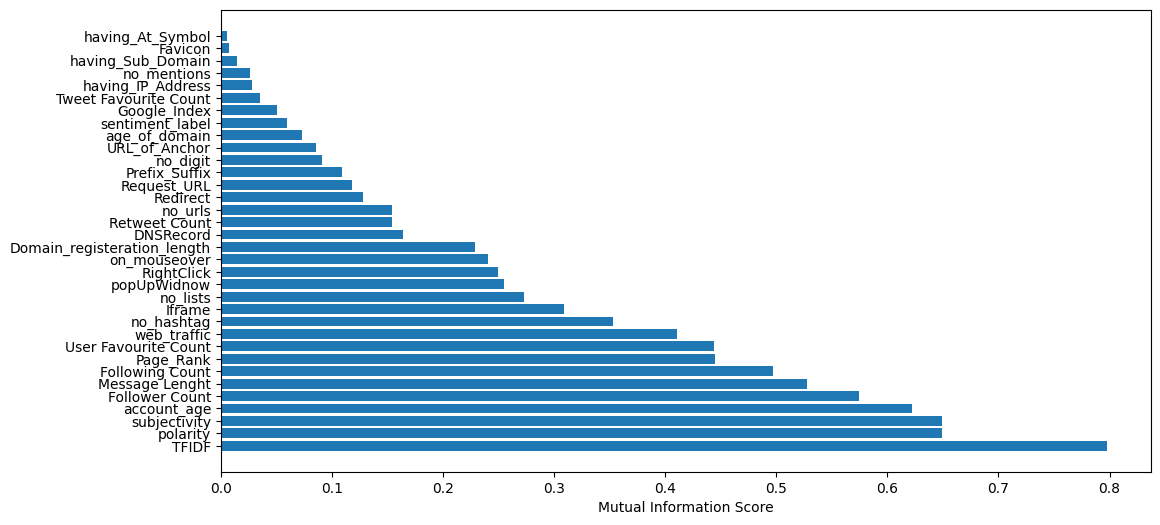

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, Normalizer
scale = StandardScaler()
scaledX = scale.fit_transform(x_feat)
X_ = pd.DataFrame(scaledX, columns=x_feat.columns)
mi_scores = mutual_info_classif(X_, y_feat, discrete_features='auto', random_state=42)
# mi_scores = mutual_info_classif(X_train1s, y_train1, discrete_features='auto', random_state=42)


mi_scores_df = pd.DataFrame({'Feature': x_feat.columns, 'Mutual_Information': mi_scores})
# mi_scores_df = pd.DataFrame({'Feature': X_train1s.columns, 'Mutual_Information': mi_scores})

mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information', ascending=False)

# Plot the Mutual Information scores
plt.figure(figsize=(12, 6))
plt.barh(mi_scores_df['Feature'], mi_scores_df['Mutual_Information'])
plt.xlabel('Mutual Information Score')
# plt.title('Mutual Information Feature Importance')
plt.show()

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=42)

count = 0 
for train_index, test_index in rskf.split(x_featt, y_featt):

    print("TRAIN:", train_index, "TEST:", test_index)
    globals()[f"X_train{count}"] , globals()[f"X_test{count}"] = x_featt[train_index], x_featt[test_index]
    globals()[f"train_{count}_Indexes"], globals()[f"test_{count}_Indexes"] = [train_index], [test_index]
    globals()[f"X_train{count}"], globals()[f"X_test{count}"] = pd.DataFrame(globals()[f"X_train{count}"], columns = x_feat.columns), pd.DataFrame(globals()[f"X_test{count}"], columns = x_feat.columns)
    globals()[f"y_train{count}"], globals()[f"y_test{count}"] = y_featt[train_index], y_featt[test_index]
    globals()[f"y_train{count}"], globals()[f"y_test{count}"] = pd.DataFrame(globals()[f"y_train{count}"], columns = y_feat.columns), pd.DataFrame(globals()[f"y_test{count}"], columns = y_feat.columns)
    count = count+1

TRAIN: [   0    2    3 ... 5997 5998 5999] TEST: [   1    8   10 ... 5986 5990 5993]
TRAIN: [   0    1    2 ... 5996 5997 5998] TEST: [  13   16   20 ... 5994 5995 5999]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   3    6   12 ... 5977 5983 5985]
TRAIN: [   0    1    3 ... 5994 5995 5999] TEST: [   2    4    5 ... 5996 5997 5998]
TRAIN: [   1    2    3 ... 5997 5998 5999] TEST: [   0    7   18 ... 5987 5989 5992]
TRAIN: [   3    4    5 ... 5995 5998 5999] TEST: [   0    1    2 ... 5970 5996 5997]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   5   10   13 ... 5979 5983 5993]
TRAIN: [   0    1    2 ... 5993 5996 5997] TEST: [   3    7   11 ... 5995 5998 5999]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   6    8   19 ... 5990 5991 5992]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   4    9   15 ... 5980 5981 5989]
TRAIN: [   0    3    4 ... 5997 5998 5999] TEST: [   1    2    8 ... 5976 5985 5987]
TRAIN: [   0    1    2 ... 5995 5997 5999] TEST: [   6    7   29 

In [12]:
for i in range(25):
    # globals()[f"Baseline_y_test{i}"] = globals()[f"y_test{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 1])
    globals()[f"Baseline_y_train{i}"] = globals()[f"y_train{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 0])
Baseline_y_train24.Tweet_Label.value_counts()

0    3200
1    1600
Name: Tweet_Label, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler, Normalizer
scale = StandardScaler()

X_train_original = X_train0
# X_train_original = X_train0
Baseline_y_train_original = Baseline_y_train0

for k in range(25):
    globals()[f"X_train_original{k}"] = globals()[f"X_train{k}"]
    globals()[f"Baseline_y_train_original{k}"] = globals()[f"Baseline_y_train{k}"]
    globals()[f"scaledX{k}"]  = scale.fit_transform(globals()[f"X_train{k}"])
    globals()[f"X_test{k}s"] = scale.fit_transform(globals()[f"X_test{k}"])

    # from imblearn.over_sampling import SMOTE
    # oversample = SMOTE()
    # globals()[f"X_train{k}sa"], globals()[f"Baseline_y_train{k}sa"] = oversample.fit_resample(globals()[f"scaledX{k}"], globals()[f"Baseline_y_train{k}"])
    # globals()[f"X_train{k}sa"] = pd.DataFrame(globals()[f"X_train{k}sa"], columns=X_train_original.columns)


    globals()[f"X_train{k}s"], globals()[f"Baseline_y_train{k}s"] =  globals()[f"scaledX{k}"], globals()[f"Baseline_y_train_original{k}"]
    globals()[f"X_train{k}s"] = pd.DataFrame(globals()[f"X_train{k}s"], columns=X_train_original.columns)
    globals()[f"X_test{k}s"] = pd.DataFrame(globals()[f"X_test{k}s"], columns=X_train_original.columns)

    globals()[f"X_train{k}o"], globals()[f"Baseline_y_train{k}o"] =  globals()[f"X_train_original{k}"], globals()[f"Baseline_y_train_original{k}"]

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\1517875826.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\1517875826.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\1517875826.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

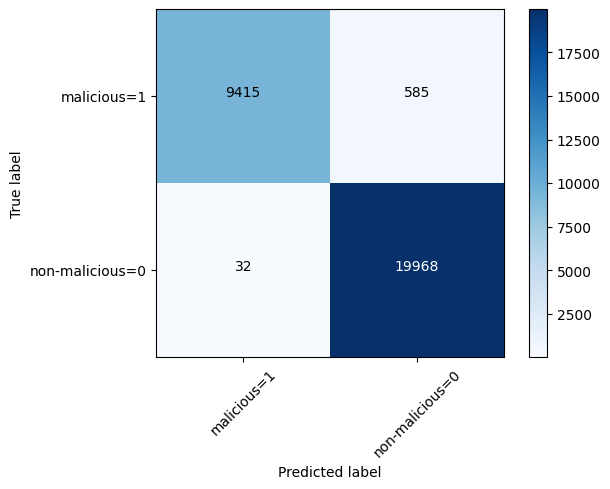

In [14]:
RF_clff = RandomForestClassifier(criterion="gini",max_features="log2",n_estimators=270, random_state=0)
# RF_clff = RandomForestClassifier(random_state=0)

# RF_clff = LogisticRegression(C=1, penalty='l2')
# RF_clff = LogisticRegression()

# RF_clff = svm.SVC()#same for optimized
# RF_clff = svm.SVC()

# RF_clff = GaussianNB()

# RF_clff = KNeighborsClassifier(n_neighbors=5)
# RF_clff = KNeighborsClassifier()

# RF_clff = GradientBoostingClassifier(n_estimators=200, random_state=0)
# RF_clff = GradientBoostingClassifier(random_state=0)

# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier()) #same for optimized
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# RF_clff = DecisionTreeClassifier(max_depth=20)
# RF_clff = DecisionTreeClassifier()


for k in range(25):
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"].drop(columns=['sub','pol']),globals()[f"Baseline_y_train{k}o"])
    globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])
    
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}sa"],globals()[f"y_train{k}sa"])


    # globals()[f"RF_y_pred{k}"] = globals()[f"RF_clff{k}"].predict(globals()[f"X_test{k}"].drop(columns=['Full_Text','sub','pol']))
    globals()[f"RF_y_pred{k}"] = globals()[f"RF_clff{k}"].predict(globals()[f"X_test{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']))
    
for k in range(25):
    
    globals()[f"Accuracy{k}"] = accuracy_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]])
    globals()[f"Recall{k}"] = recall_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]], average='macro')
    globals()[f"Precision{k}"] = precision_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]], average='macro')
    globals()[f"F1{k}"] = f1_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]], average='macro')
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]],labels=[1,0])
    # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))
  
cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11

CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in RF_y_pred0])
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
print(plot_confusion_matrix(CM, classes=['malicious=1','non-malicious=0'],normalize= False))

In [16]:
TN = CM[1][1]
FN = CM[0][1]
TP = CM[0][0]
FP = CM[1][0]


print("FP:", FP)
print("TN:", TN)

fpr1 = FP/(FP+TN)
print(fpr1)

FP: 32
TN: 19968
0.0016


0
1
2
3
4


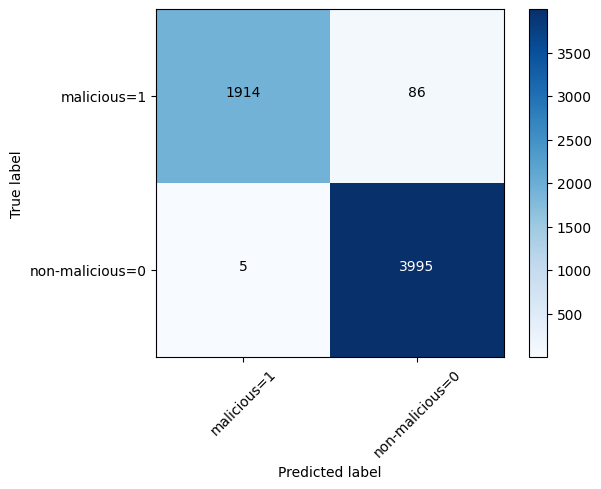


5
6
7
8
9


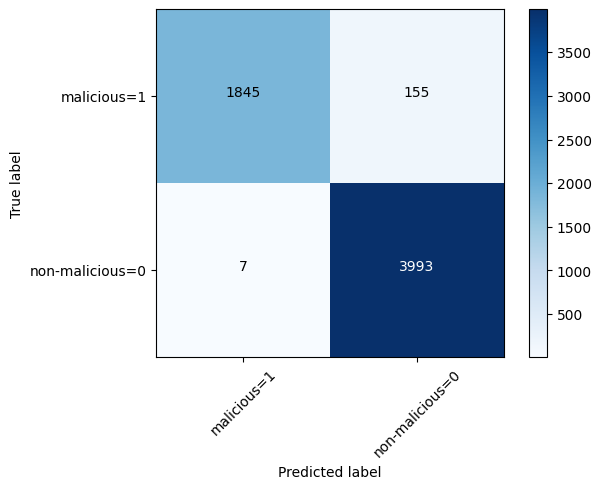


10
11
12
13
14


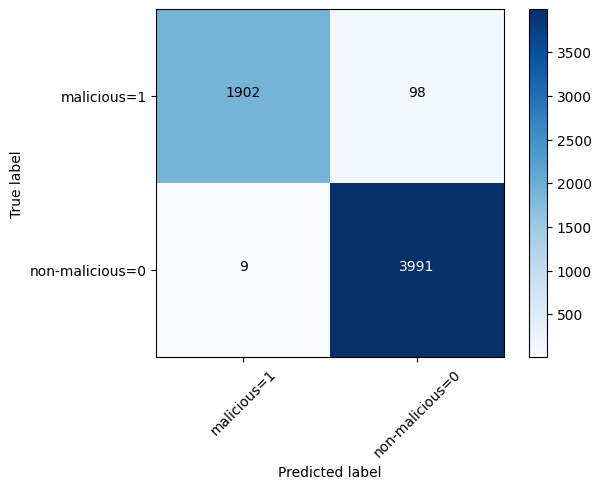


15
16
17
18
19


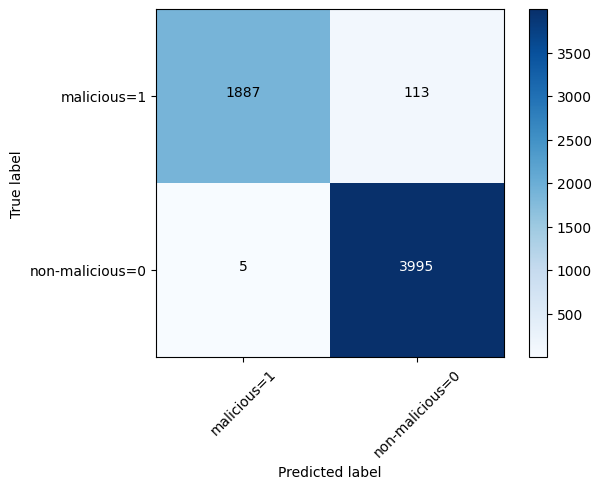


20
21
22
23
24


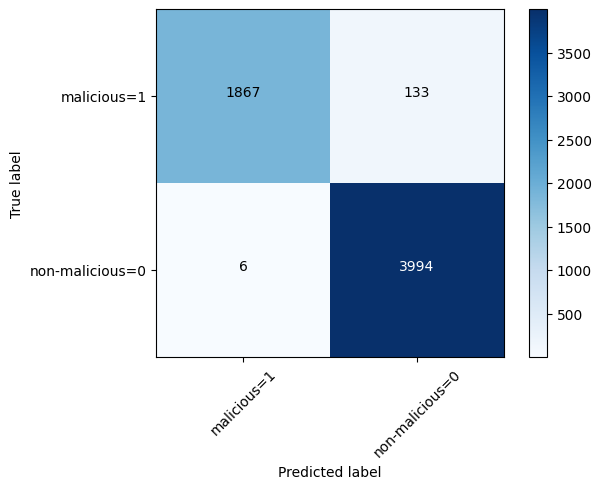

In [17]:
num_items = 0
num_per_iteration = 5
averages = []
malicious_metrics =[]
legit_metrics = []
report_metrics=[]

for l in range(5):
    mal_metrics =[]
    leg_metrics = []

    cmx_avg00 = 0
    cmx_avg00 = 0
    cmx_avg01 = 0
    cmx_avg02 = 0
    cmx_avg10 = 0
    cmx_avg11 = 0
    cmx_avg12 = 0
    cmx_avg20 = 0
    cmx_avg21 = 0
    cmx_avg22 = 0
    for i in range(num_items,num_per_iteration):
        print(i)
        globals()[f"Accuracy{i}"] = accuracy_score(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{i}"]])
        globals()[f"Recall{i}"] = recall_score(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{i}"]], average='macro')
        globals()[f"Precision{i}"] = precision_score(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{i}"]], average='macro')
        globals()[f"F1{i}"] = f1_score(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{i}"]], average='macro')
        globals()[f"cmx{i}"] = confusion_matrix(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{i}"]],labels=[1,0])
        globals()[f"report{i}"] = classification_report(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{i}"], target_names=['malicious=1','clean=0'], digits=3, output_dict=True)
        mal_metrics.append([globals()[f"report{i}"]['malicious=1']['precision'], globals()[f"report{i}"]['malicious=1']['recall'], globals()[f"report{i}"]['malicious=1']['f1-score']])
        leg_metrics.append([globals()[f"report{i}"]['clean=0']['precision'], globals()[f"report{i}"]['clean=0']['recall'], globals()[f"report{i}"]['clean=0']['f1-score']])
        # report_metrics.append([report['report=2']['precision'], report['report=2']['recall'], report['report=2']['f1-score']])
       

        cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
        cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
        cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
        cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
  
    malicious_metrics.append([sum(x)/len(x) for x in zip(*mal_metrics)])
    legit_metrics.append([sum(x)/len(x) for x in zip(*leg_metrics)])
    CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in RF_y_pred0])
    CM[0][0] = cmx_avg00
    CM[0][1] = cmx_avg01 
    CM[1][0] = cmx_avg10
    CM[1][1] = cmx_avg11
    print(plot_confusion_matrix(CM, classes=['malicious=1','non-malicious=0'],normalize= False))

    num_items = num_items + 5
    num_per_iteration = num_per_iteration + 5

In [18]:
legit_metrics

[[0.9974424083493559, 0.9570000000000001, 0.9764690030039404],
 [0.996244393374116, 0.9225, 0.9545399564326642],
 [0.9953927204693418, 0.951, 0.9721677421722423],
 [0.9973472110392445, 0.9435, 0.9687982902745873],
 [0.9968519322622666, 0.9335000000000001, 0.9635935394791536]]

In [19]:
malicious_metrics

[[0.9791969414052065, 0.99875, 0.9888067562542325],
 [0.9649590570904992, 0.9982500000000002, 0.9807488480355145],
 [0.9764446506665057, 0.9977499999999999, 0.9868739298459402],
 [0.9731818350529433, 0.99875, 0.9856290885078638],
 [0.9681939981075967, 0.9984999999999999, 0.9830046330824599]]

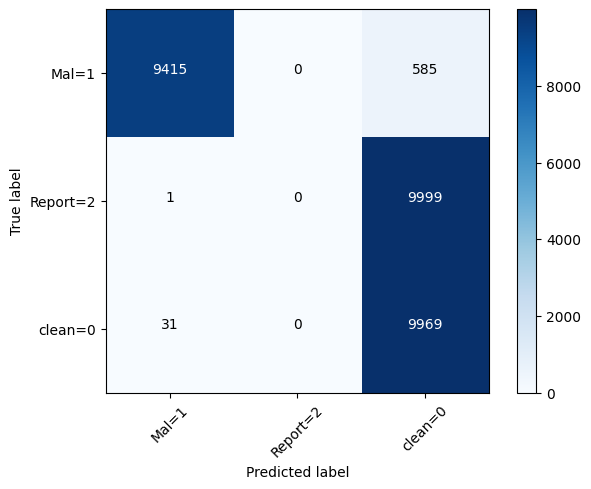

In [20]:
for k in range(25):
    
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,2,0])
    # print(plot_confusion_matrix(globals()[f"Report_Phase_cmx{k}"], classes=['Report=2','non-Report=1'],normalize= False,  title='Confusion matrix'))

cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
    cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
    cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
    cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
    cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

CM = confusion_matrix(y_test0, RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[0][2] = cmx_avg02 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
CM[1][2] = cmx_avg12
CM[2][0] = cmx_avg20
CM[2][1] = cmx_avg21
CM[2][2] = cmx_avg22

print(plot_confusion_matrix(CM, classes=['Mal=1','Report=2','clean=0'],normalize= False))

In [21]:
TN = CM[2][2]+ CM[2][1]  + CM[1][2] + CM[1][1]
FN = CM[0][1] +  CM[0][2]
TP = CM[0][0]
FP = CM[2][0]  + CM[1][0]


print("FP:", FP)
print("TN:", TN)

fpr1 = FP/(FP+TN)
print(fpr1)

FP: 32
TN: 19968
0.0016


WITH SENTIMENTS

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2290398586.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"Sent_RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])


C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2290398586.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"Sent_RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2290398586.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"Sent_RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2290398586.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"Sent_RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}

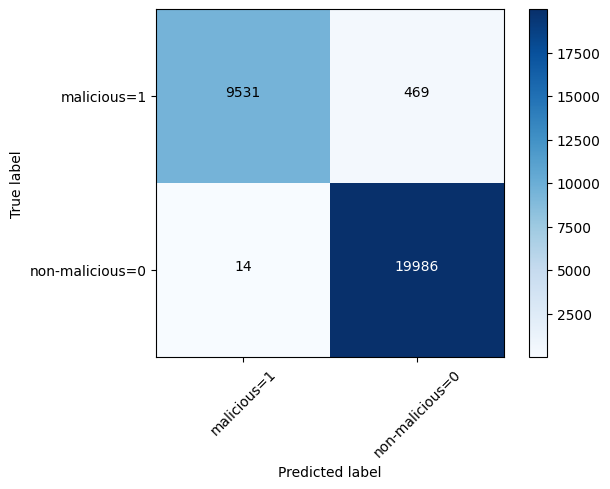

In [22]:
RF_clff = RandomForestClassifier(criterion="gini",max_features="log2",n_estimators=270, random_state=0)
# RF_clff = RandomForestClassifier(random_state=0)

# RF_clff = LogisticRegression(C=1, penalty='l2')
# RF_clff = LogisticRegression()

# RF_clff = svm.SVC(C= 1000, kernel='rbf')
# RF_clff = svm.SVC() #same for optimized
# RF_clff = svm.SVC()

# RF_clff = GaussianNB()

# RF_clff = KNeighborsClassifier(n_neighbors=5)
# RF_clff = KNeighborsClassifier()

# RF_clff = GradientBoostingClassifier(n_estimators=200, random_state=0)
# RF_clff = GradientBoostingClassifier(random_state=0)

# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier()) #same for optimized
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# RF_clff = DecisionTreeClassifier(max_depth=20)
# RF_clff = DecisionTreeClassifier()

for k in range(25):
    globals()[f"Sent_RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
    # globals()[f"Sent_RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"Baseline_y_train{k}o"])

    globals()[f"RF_y_pred{k}"] = globals()[f"Sent_RF_clff{k}"].predict(globals()[f"X_test{k}s"])
    # globals()[f"RF_y_pred{k}"] = globals()[f"Sent_RF_clff{k}"].predict(globals()[f"X_test{k}"].drop(columns=['Full_Text']))


for k in range(25):

    globals()[f"Sent_Accuracy{k}"] = accuracy_score( globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"])
    globals()[f"Sent_Recall{k}"] = recall_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"Sent_Precision{k}"] = precision_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"Sent_F1{k}"] = f1_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"Sent_cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"],labels=[1,0])
    # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))


cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for k in range(25):
    cmx_avg00 = globals()[f"Sent_cmx{k}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"Sent_cmx{k}"][0][1] + cmx_avg01
    cmx_avg10 = globals()[f"Sent_cmx{k}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"Sent_cmx{k}"][1][1] + cmx_avg11

Sent_CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in RF_y_pred0])
Sent_CM[0][0] = cmx_avg00
Sent_CM[0][1] = cmx_avg01 
Sent_CM[1][0] = cmx_avg10
Sent_CM[1][1] = cmx_avg11
print(plot_confusion_matrix(Sent_CM, classes=['malicious=1','non-malicious=0'],normalize= False))

In [23]:
TN = Sent_CM[1][1]
FN = Sent_CM[0][1]
TP = Sent_CM[0][0]
FP = Sent_CM[1][0]


print("FP:", FP)
print("TN:", TN)

fpr = FP/(FP+TN)
print(fpr)

FP: 14
TN: 19986
0.0007


0
1
2
3
4


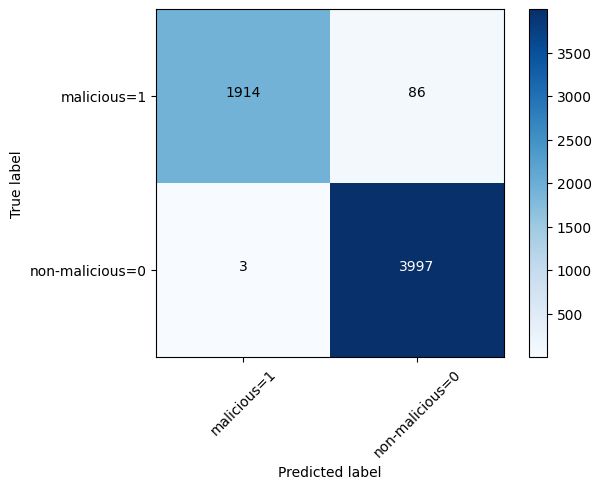


5
6
7
8
9


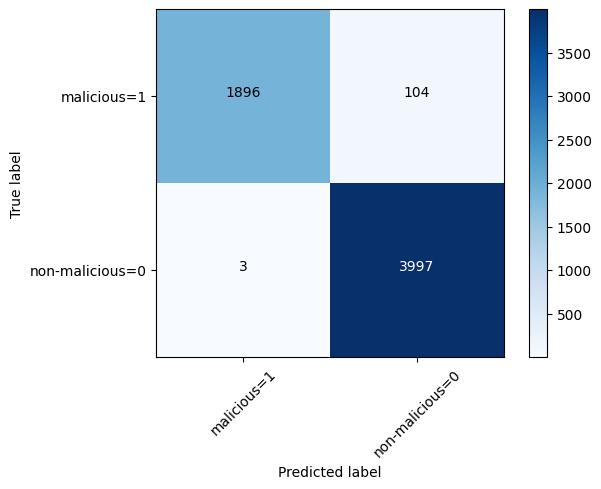


10
11
12
13
14


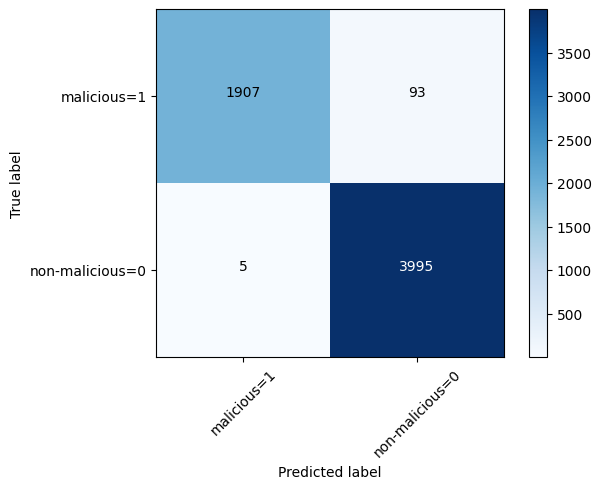


15
16
17
18
19


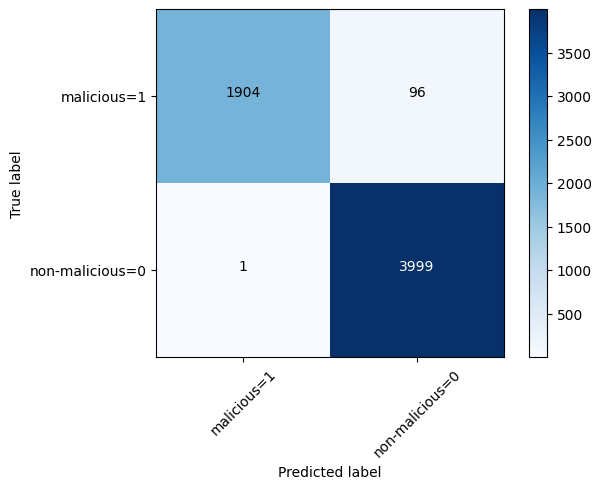


20
21
22
23
24


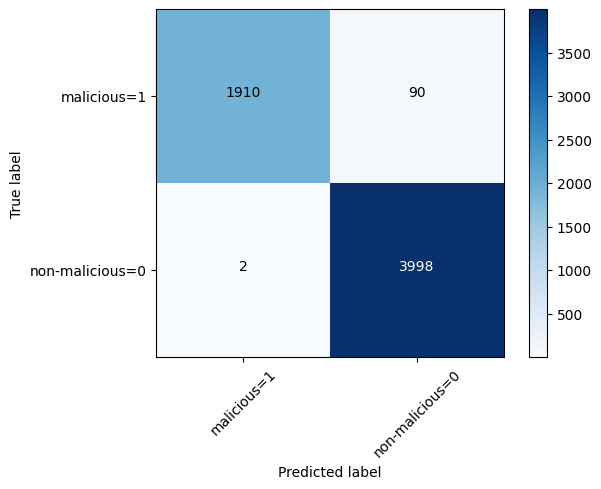

In [24]:
num_items = 0
num_per_iteration = 5
averages = []
sent_legit_metrics = []
sent_malicious_metrics = []

for l in range(5):
    sent_mal_metrics = []
    sent_leg_metrics = []

    cmx_avg00 = 0
    cmx_avg00 = 0
    cmx_avg01 = 0
    cmx_avg02 = 0
    cmx_avg10 = 0
    cmx_avg11 = 0
    cmx_avg12 = 0
    cmx_avg20 = 0
    cmx_avg21 = 0
    cmx_avg22 = 0
    for k in range(num_items,num_per_iteration):
        print(k)
        globals()[f"Sent_Accuracy{k}"] = accuracy_score( globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"])
        globals()[f"Sent_Recall{k}"] = recall_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], average='macro')
        globals()[f"Sent_Precision{k}"] = precision_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], average='macro')
        globals()[f"Sent_F1{k}"] = f1_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], average='macro')
        globals()[f"Sent_cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"],labels=[1,0])
        # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))
        globals()[f"report{k}"] = classification_report(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), globals()[f"RF_y_pred{k}"], target_names=['malicious=1','clean=0'], digits=3, output_dict=True)
        sent_mal_metrics.append([globals()[f"report{k}"]['malicious=1']['precision'], globals()[f"report{k}"]['malicious=1']['recall'], globals()[f"report{k}"]['malicious=1']['f1-score']])
        sent_leg_metrics.append([globals()[f"report{k}"]['clean=0']['precision'], globals()[f"report{k}"]['clean=0']['recall'], globals()[f"report{k}"]['clean=0']['f1-score']])
        # report_metrics.append([report['report=2']['precision'], report['report=2']['recall'], report['report=2']['f1-score']])


        cmx_avg00 = globals()[f"Sent_cmx{k}"][0][0] + cmx_avg00
        cmx_avg01 = globals()[f"Sent_cmx{k}"][0][1] + cmx_avg01
        cmx_avg10 = globals()[f"Sent_cmx{k}"][1][0] + cmx_avg10
        cmx_avg11 = globals()[f"Sent_cmx{k}"][1][1] + cmx_avg11

    sent_malicious_metrics.append([sum(x)/len(x) for x in zip(*sent_mal_metrics)])
    sent_legit_metrics.append([sum(x)/len(x) for x in zip(*sent_leg_metrics)])

    Sent_CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in RF_y_pred0])
    Sent_CM[0][0] = cmx_avg00
    Sent_CM[0][1] = cmx_avg01 
    Sent_CM[1][0] = cmx_avg10
    Sent_CM[1][1] = cmx_avg11
    
    print(plot_confusion_matrix(Sent_CM, classes=['malicious=1','non-malicious=0'],normalize= False))
    
    num_items = num_items + 5
    num_per_iteration = num_per_iteration + 5

In [25]:
sent_legit_metrics

[[0.9984615384615385, 0.9570000000000001, 0.9769892456015258],
 [0.9984575835475578, 0.9480000000000001, 0.9716812049932013],
 [0.9974619289340101, 0.9535, 0.9745755875866287],
 [0.9994884910485933, 0.9520000000000002, 0.9747521735943439],
 [0.9989637305699481, 0.9549999999999998, 0.9762010697535299]]

In [26]:
sent_malicious_metrics

[[0.9791852636235483, 0.99925, 0.9890524594774395],
 [0.9753392514286597, 0.99925, 0.9869744815090818],
 [0.9775740502628028, 0.99875, 0.9879635503169271],
 [0.9769034870105834, 0.99975, 0.9881068584389446],
 [0.9782221647760707, 0.9995, 0.9886866368094374]]

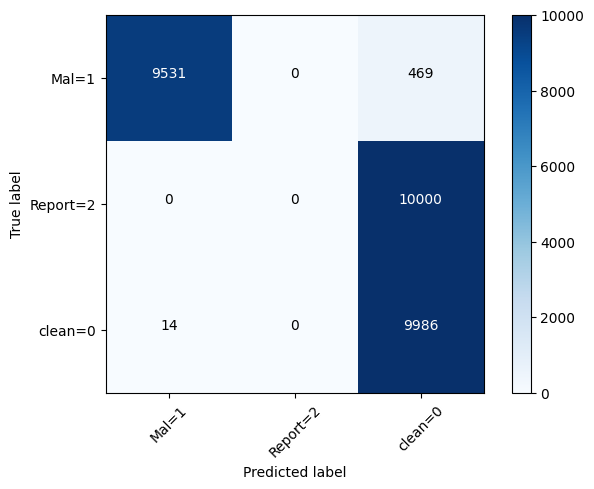

In [27]:
for k in range(25):
    
    globals()[f"Sent_cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,2,0])
    
cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"Sent_cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"Sent_cmx{i}"][0][1] + cmx_avg01
    cmx_avg02 = globals()[f"Sent_cmx{i}"][0][2] + cmx_avg02
    cmx_avg10 = globals()[f"Sent_cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"Sent_cmx{i}"][1][1] + cmx_avg11
    cmx_avg12 = globals()[f"Sent_cmx{i}"][1][2] + cmx_avg12
    cmx_avg20 = globals()[f"Sent_cmx{i}"][2][0] + cmx_avg20
    cmx_avg21 = globals()[f"Sent_cmx{i}"][2][1] + cmx_avg21
    cmx_avg22 = globals()[f"Sent_cmx{i}"][2][2] + cmx_avg22

Sent_CM = confusion_matrix(y_test0, RF_y_pred0)
Sent_CM[0][0] = cmx_avg00
Sent_CM[0][1] = cmx_avg01 
Sent_CM[0][2] = cmx_avg02 
Sent_CM[1][0] = cmx_avg10
Sent_CM[1][1] = cmx_avg11
Sent_CM[1][2] = cmx_avg12
Sent_CM[2][0] = cmx_avg20
Sent_CM[2][1] = cmx_avg21
Sent_CM[2][2] = cmx_avg22

print(plot_confusion_matrix(Sent_CM, classes=['Mal=1','Report=2','clean=0'],normalize= False))

In [28]:
TN = Sent_CM[2][2]+ Sent_CM[2][1]  + Sent_CM[1][2] + Sent_CM[1][1]
FN = Sent_CM[0][1] +  Sent_CM[0][2]
TP = Sent_CM[0][0]
FP = Sent_CM[2][0]  + Sent_CM[1][0]


print("FP:", FP)
print("TN:", TN)

sent_fpr1 = FP/(FP+TN)
print(sent_fpr1)

FP: 14
TN: 19986
0.0007


In [29]:
num_items = 0
num_per_iteration = 5
averages = []
from prettytable import PrettyTable
tableX = PrettyTable()
tableY = PrettyTable()
tableX.add_column("Metrics ", ['Accuracy','Recall','Precision','F1'])
tableY.add_column("Metrics ", ['Accuracy','Recall','Precision','F1'])
[Acc_sum, Rec_sum, Pre_sum, F1_sum] = [0,0,0,0]
[Sent_Acc_sum, Sent_Rec_sum, Sent_Pre_sum, Sent_F1_sum] = [0,0,0,0]
for k in range(5):
    Acc_avg,Acc2_avg,Acc3_avg,Sent_Acc_avg,Rec_avg,Rec2_avg,Rec3_avg,Sent_Rec_avg,Pre_avg,Pre2_avg,Pre3_avg,Sent_Pre_avg,F1_avg,F12_avg,F13_avg,Sent_F1_avg = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

    for i in range(num_items,num_per_iteration):
        Acc_avg = globals()[f"Accuracy{i}"] + Acc_avg
        Sent_Acc_avg = globals()[f"Sent_Accuracy{i}"] + Sent_Acc_avg 
        # Acc2_avg = globals()[f"Accuracy2_{i}"] + Acc2_avg
        # Acc3_avg = globals()[f"Accuracy3_{i}"] + Acc3_avg
        
        Rec_avg = globals()[f"Recall{i}"] + Rec_avg
        Sent_Rec_avg = globals()[f"Sent_Recall{i}"] + Sent_Rec_avg 
        # Rec2_avg = globals()[f"Recall2_{i}"] + Rec2_avg
        # Rec3_avg = globals()[f"Recall3_{i}"] + Rec3_avg
        
        Pre_avg = globals()[f"Precision{i}"] + Pre_avg
        Sent_Pre_avg = globals()[f"Sent_Precision{i}"] + Sent_Pre_avg 
        # Pre2_avg = globals()[f"Precision2_{i}"] + Pre2_avg
        # Pre3_avg = globals()[f"Precision3_{i}"] + Pre3_avg
        
        F1_avg = globals()[f"F1{i}"] + F1_avg
        Sent_F1_avg = globals()[f"Sent_F1{i}"] + Sent_F1_avg 
        # F12_avg = globals()[f"F12_{i}"] + F12_avg
        # F13_avg = globals()[f"F13_{i}"] + F13_avg

    [Acc_su, Rec_su, Pre_su, F1_su] = [0,0,0,0]
    [Acc_su, Rec_su, Pre_su, F1_su] = [Acc_avg/5, Rec_avg/5, Pre_avg/5, F1_avg/5]
    [Acc_sum, Rec_sum, Pre_sum, F1_sum] = [Acc_sum + Acc_su, Rec_sum + Rec_su, Pre_sum + Pre_su, F1_sum+ F1_su]
    [Sent_Acc_su, Sent_Rec_su, Sent_Pre_su, Sent_F1_su] = [0,0,0,0]
    [Sent_Acc_su, Sent_Rec_su, Sent_Pre_su, Sent_F1_su] = [Sent_Acc_avg/5, Sent_Rec_avg/5, Sent_Pre_avg/5, Sent_F1_avg/5]
    [Sent_Acc_sum, Sent_Rec_sum, Sent_Pre_sum, Sent_F1_sum] = [Sent_Acc_sum + Sent_Acc_su, Sent_Rec_sum + Sent_Rec_su, Sent_Pre_sum + Sent_Pre_su, Sent_F1_sum+ Sent_F1_su]

    num_items = num_items + 5
    num_per_iteration = num_per_iteration + 5
    tableX.add_column("Iteration "+ str(k), [Acc_avg/5, Rec_avg/5, Pre_avg/5, F1_avg/5])
    tableY.add_column("Iteration "+ str(k), [Sent_Acc_avg/5, Sent_Rec_avg/5, Sent_Pre_avg/5, Sent_F1_avg/5])


tableX.add_column("global Average", [Acc_sum/5, Rec_sum/5, Pre_sum/5, F1_sum/5])
tableY.add_column("global Average", [Sent_Acc_sum/5, Sent_Rec_sum/5, Sent_Pre_sum/5, Sent_F1_sum/5])

In [30]:
tableX

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9848333333333334,0.9730000000000001,0.9821666666666667,0.9803333333333333,0.9768333333333332,0.9794333333333334
Recall,0.977875,0.960375,0.974375,0.971125,0.966,0.9699500000000001
Precision,0.9883196748772812,0.9806017252323075,0.9859186855679237,0.985264523046094,0.9825229651849317,0.9845255147817076
F1,0.9826378796290862,0.9676444022340893,0.9795208360090912,0.9772136893912254,0.9732990862808067,0.9760631787088597


In [31]:
tableY

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9851666666666666,0.9821666666666667,0.9836666666666666,0.9838333333333334,0.9846666666666666,0.9839
Recall,0.978125,0.973625,0.976125,0.9758749999999999,0.9772500000000001,0.9762000000000001
Precision,0.9888234010425435,0.9868984174881088,0.9875179895984065,0.9881959890295885,0.9885929476730094,0.9880057489663313
F1,0.9830208525394827,0.9793278432511416,0.981269568951778,0.9814295160166442,0.9824438532814836,0.9814983268081059


In [32]:
[sum(x)/len(x) for x in zip(*malicious_metrics)]

[0.9723952964645504, 0.9984, 0.9850126511452022]

In [33]:
[sum(x)/len(x) for x in zip(*sent_malicious_metrics)]

[0.9774448434203329, 0.9993000000000001, 0.988156797310366]

In [34]:
[sum(x)/len(x) for x in zip(*sent_legit_metrics)]

[0.9985666545123296, 0.9531000000000001, 0.9748398563058458]

In [35]:
[sum(x)/len(x) for x in zip(*legit_metrics)]

[0.996655733098865, 0.9415000000000001, 0.9671137062725175]

In [36]:
print(sent_fpr1)

0.0007


In [37]:
print(fpr1)

0.0016


In [38]:
#Random Forest
def weighted_evaluation_metric(weights, precision, recall, f1_score, false_positive_rate):

    weighted_precision = weights['precision'] * precision
    weighted_recall = weights['recall'] * recall
    weighted_f1_score = weights['f1_score'] * f1_score
    weighted_false_positive_rate = weights['false_positive_rate'] * false_positive_rate
    
    weighted_sum = weighted_precision + weighted_recall + weighted_f1_score - weighted_false_positive_rate
    
    return weighted_sum

weights = {
    'precision': 0.4,
    'recall': 0.1,
    'f1_score': 0.1,
    'false_positive_rate': 0.4
}

precision_value, recall_value, f1_score_value,false_positive_rate_value = Sent_Pre_sum/5, Sent_Rec_sum/5, Sent_F1_sum/5,fpr

novel_metric = weighted_evaluation_metric(weights, precision_value, recall_value, f1_score_value, false_positive_rate_value)
print("WEM RF:", novel_metric)


WEM RF: 0.5906921322673432


## MULTI SYSTEM

In [39]:
for i in range(25):
    # globals()[f"Baseline_y_test{i}"] = globals()[f"y_test{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 1])
    globals()[f"Baseline_y_train{i}"] = globals()[f"y_train{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 2])
# Baseline_y_train24.Tweet_Label.value_counts()

In [40]:
from sklearn.preprocessing import StandardScaler, Normalizer
scale = StandardScaler()

X_train_original = X_train0
Baseline_y_train_original = Baseline_y_train0

for k in range(25):
    globals()[f"X_train_original{k}"] = globals()[f"X_train{k}"]
    globals()[f"Baseline_y_train_original{k}"] = globals()[f"Baseline_y_train{k}"]
    globals()[f"scaledX{k}"]  = scale.fit_transform(globals()[f"X_train{k}"])
    globals()[f"X_test{k}s"] = scale.fit_transform(globals()[f"X_test{k}"])

    # from imblearn.over_sampling import SMOTE
    # oversample = SMOTE()
    # globals()[f"X_train{k}sa"], globals()[f"Baseline_y_train{k}sa"] = oversample.fit_resample(globals()[f"scaledX{k}"], globals()[f"Baseline_y_train{k}"])
    # globals()[f"X_train{k}sa"] = pd.DataFrame(globals()[f"X_train{k}sa"], columns=X_train_original.columns)


    globals()[f"X_train{k}s"], globals()[f"Baseline_y_train{k}s"] =  globals()[f"scaledX{k}"], globals()[f"Baseline_y_train_original{k}"]
    globals()[f"X_train{k}s"] = pd.DataFrame(globals()[f"X_train{k}s"], columns=X_train_original.columns)
    globals()[f"X_test{k}s"] = pd.DataFrame(globals()[f"X_test{k}s"], columns=X_train_original.columns)

    globals()[f"X_train{k}o"], globals()[f"Baseline_y_train{k}o"] =  globals()[f"X_train_original{k}"], globals()[f"Baseline_y_train_original{k}"]

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\55946692.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])


C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\55946692.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\55946692.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\55946692.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

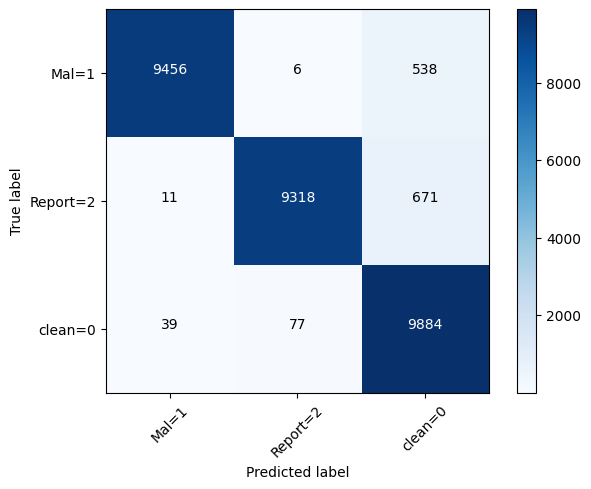

In [41]:
RF_clff = RandomForestClassifier(criterion="gini",max_features="log2",n_estimators=270,random_state=0) 
# RF_clff = RandomForestClassifier(random_state=0)

# RF_clff = LogisticRegression(C=1, penalty='l2')
# RF_clff = LogisticRegression()

# RF_clff = svm.SVC()#same for optimized
# RF_clff = svm.SVC()

# RF_clff = GaussianNB()

# RF_clff = KNeighborsClassifier(n_neighbors=5)
# RF_clff = KNeighborsClassifier()

# RF_clff = GradientBoostingClassifier(n_estimators=200, random_state=0)
# RF_clff = GradientBoostingClassifier(random_state=0)

# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier()) #same for optimized
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# RF_clff = DecisionTreeClassifier(max_depth=20)
# RF_clff = DecisionTreeClassifier()

for k in range(25):
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"y_train{k}o"])
    globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']),globals()[f"Baseline_y_train{k}s"])
    
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}sa"],globals()[f"y_train{k}sa"])


    globals()[f"RF_y_pred{k}"] = globals()[f"RF_clff{k}"].predict(globals()[f"X_test{k}s"].drop(columns=['subjectivity', 'polarity', 'sentiment_label','TFIDF']))

for k in range(25):
    
    globals()[f"Accuracy2_{k}"] = accuracy_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"])
    globals()[f"Recall2_{k}"] = recall_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"Precision2_{k}"] = precision_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"F12_{k}"] = f1_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,2,0])
    # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))
  
cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
    cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
    cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
    cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
    cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

CM = confusion_matrix(y_test0, RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[0][2] = cmx_avg02 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
CM[1][2] = cmx_avg12
CM[2][0] = cmx_avg20
CM[2][1] = cmx_avg21
CM[2][2] = cmx_avg22
print(plot_confusion_matrix(CM, classes=['Mal=1','Report=2','clean=0'],normalize= False))

In [42]:
TN = CM[2][2]+ CM[2][1]  + CM[1][2] + CM[1][1]
FN = CM[0][1] +  CM[0][2]
TP = CM[0][0]
FP = CM[2][0]  + CM[1][0]


print("FP:", FP)
print("TN:", TN)

fpr = FP/(FP+TN)
print(fpr)

FP: 50
TN: 19950
0.0025


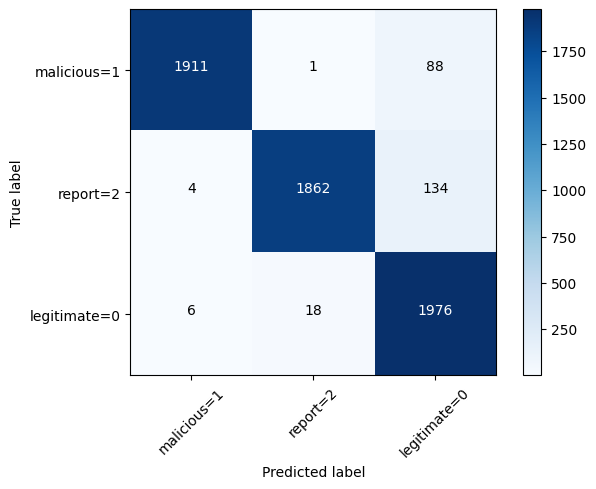

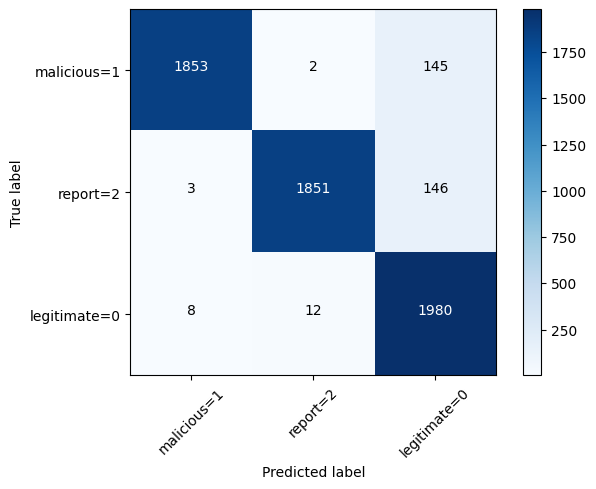

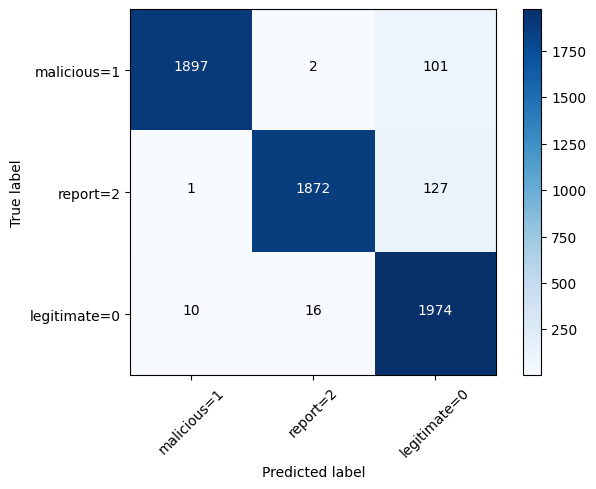

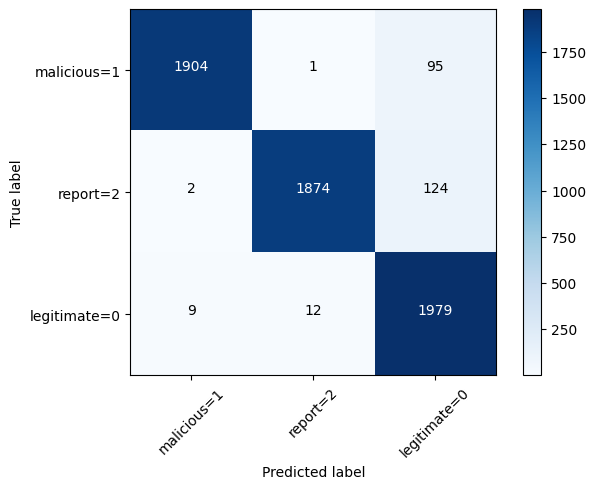

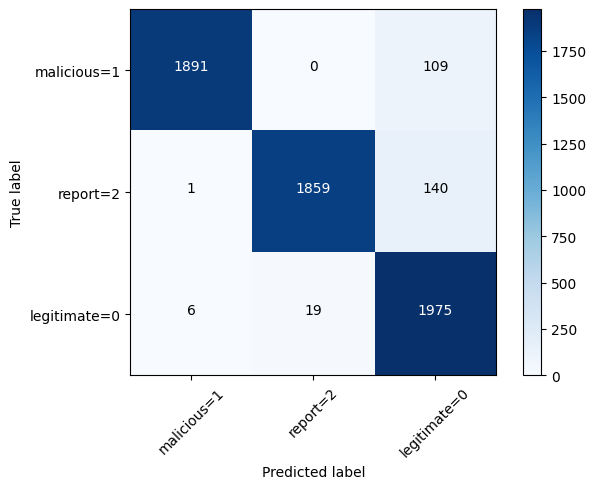

In [43]:
num_items = 0
num_per_iteration = 5
averages = []
legit_metrics2 = []
malicious_metrics2 = []
report_metrics2 = []

for l in range(5):
    mal_metrics2 = []
    leg_metrics2 = []
    rep_metrics2 =[]
 
    cmx_avg00 = 0
    cmx_avg00 = 0
    cmx_avg01 = 0
    cmx_avg02 = 0
    cmx_avg10 = 0
    cmx_avg11 = 0
    cmx_avg12 = 0
    cmx_avg20 = 0
    cmx_avg21 = 0
    cmx_avg22 = 0
    for i in range(num_items,num_per_iteration):
        globals()[f"report{i}"] = classification_report(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 2]), globals()[f"RF_y_pred{i}"], target_names=['malicious=1','clean=0', 'report=2'], digits=3, output_dict=True)
        
        mal_metrics2.append([globals()[f"report{i}"]['malicious=1']['precision'], globals()[f"report{i}"]['malicious=1']['recall'], globals()[f"report{i}"]['malicious=1']['f1-score']])
        leg_metrics2.append([globals()[f"report{i}"]['clean=0']['precision'], globals()[f"report{i}"]['clean=0']['recall'], globals()[f"report{i}"]['clean=0']['f1-score']])
        rep_metrics2.append([globals()[f"report{i}"]['report=2']['precision'], globals()[f"report{i}"]['report=2']['recall'], globals()[f"report{i}"]['report=2']['f1-score']])

        cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
        cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
        cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
        cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
        cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
        cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
        cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
        cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
        cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

    malicious_metrics2.append([sum(x)/len(x) for x in zip(*mal_metrics2)])
    legit_metrics2.append([sum(x)/len(x) for x in zip(*leg_metrics2)])
    report_metrics2.append([sum(x)/len(x) for x in zip(*rep_metrics2)])
    CM = confusion_matrix(y_test0, RF_y_pred0)
    CM[0][0] = cmx_avg00
    CM[0][1] = cmx_avg01 
    CM[0][2] = cmx_avg02 
    CM[1][0] = cmx_avg10
    CM[1][1] = cmx_avg11
    CM[1][2] = cmx_avg12
    CM[2][0] = cmx_avg20
    CM[2][1] = cmx_avg21
    CM[2][2] = cmx_avg22
    # print(plot_confusion_matrix(CM, classes=['malicious=1','non-malicious=0'],normalize= False, ))
    print(plot_confusion_matrix(CM, classes=['malicious=1','report=2','legitimate=0'],normalize= False))
    num_items = num_items + 5
    num_per_iteration = num_per_iteration + 5

with sent

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\3870244212.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\3870244212.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\3870244212.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\C

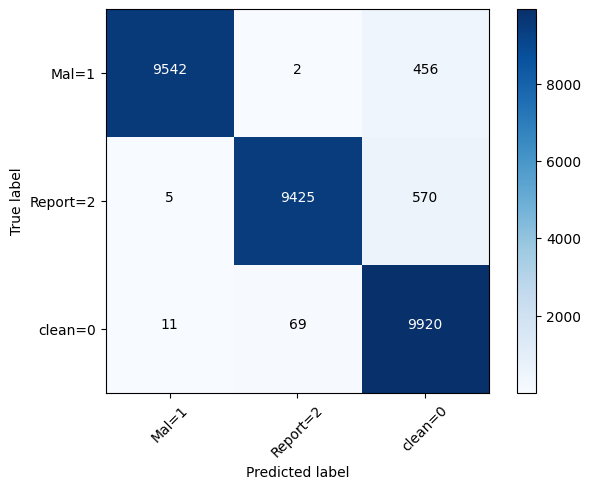

In [44]:
RF_clff = RandomForestClassifier(criterion="gini",max_features="log2",n_estimators=270,random_state=0) 
# RF_clff = RandomForestClassifier(random_state=0)

# RF_clff = LogisticRegression(C=1, penalty='l1')
# RF_clff = LogisticRegression()

# RF_clff = svm.SVC(C= 1000, kernel='rbf')
# RF_clff = svm.SVC()#same for optimized
# RF_clff = svm.SVC()

# RF_clff = GaussianNB()

# RF_clff = KNeighborsClassifier(n_neighbors=5)
# RF_clff = KNeighborsClassifier()

# RF_clff = GradientBoostingClassifier(n_estimators=200, random_state=0)
# RF_clff = GradientBoostingClassifier(random_state=0)

# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier()) #same for optimized
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# RF_clff = DecisionTreeClassifier(max_depth=20)
# RF_clff = DecisionTreeClassifier()

for k in range(25):
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"y_train{k}o"])
    globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}sa"],globals()[f"y_train{k}sa"])


    globals()[f"RF_y_pred{k}"] = globals()[f"RF_clff{k}"].predict(globals()[f"X_test{k}s"])

for k in range(25):
    
    globals()[f"Accuracy3_{k}"] = accuracy_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"])
    globals()[f"Recall3_{k}"] = recall_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"Precision3_{k}"] = precision_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"F13_{k}"] = f1_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,2,0])
    # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))
  
cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
    cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
    cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
    cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
    cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

CM = confusion_matrix(y_test0, RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[0][2] = cmx_avg02 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
CM[1][2] = cmx_avg12
CM[2][0] = cmx_avg20
CM[2][1] = cmx_avg21
CM[2][2] = cmx_avg22
print(plot_confusion_matrix(CM, classes=['Mal=1','Report=2','clean=0'],normalize= False))

In [45]:
TN = CM[2][2]+ CM[2][1]  + CM[1][2] + CM[1][1]
FN = CM[0][1] +  CM[0][2]
TP = CM[0][0]
FP = CM[2][0]  + CM[1][0]


print("FP:", FP)
print("TN:", TN)

sent_fpr = FP/(FP+TN)
print(sent_fpr)

FP: 16
TN: 19984
0.0008


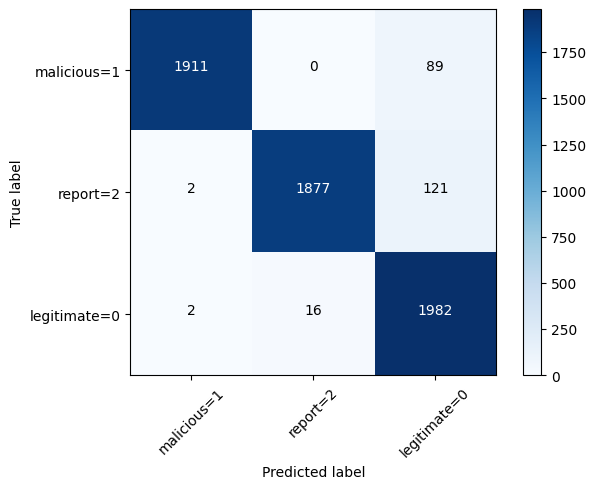

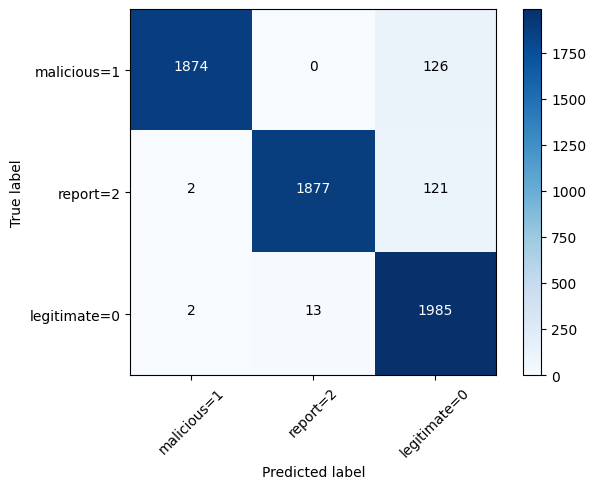

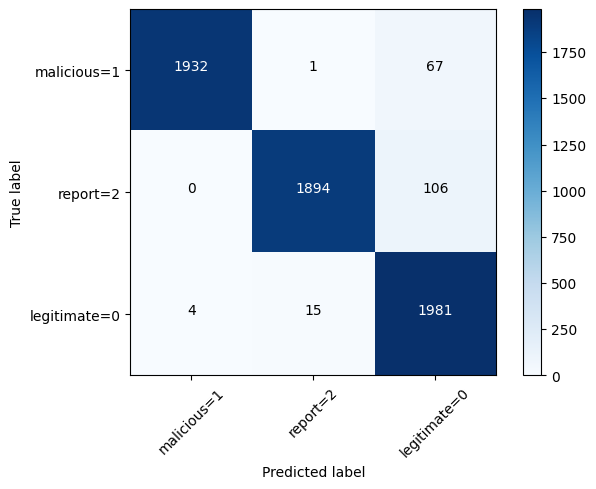

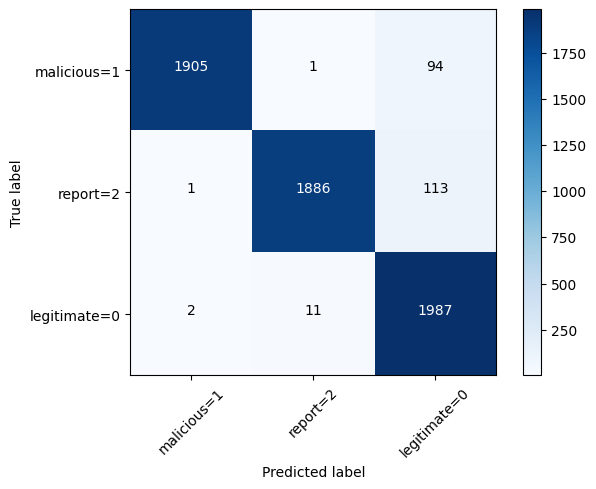

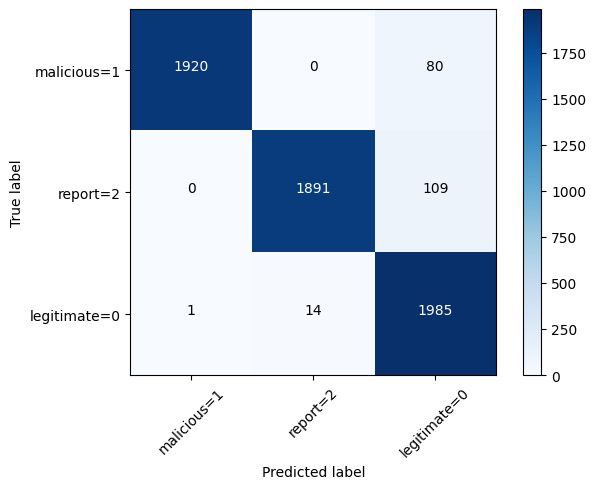

In [46]:
num_items = 0
num_per_iteration = 5
averages = []
legit_metrics3 = []
malicious_metrics3 = []
report_metrics3 = []

for l in range(5):
    mal_metrics3 = []
    leg_metrics3 = []
    rep_metrics3 =[]
 
    cmx_avg00 = 0
    cmx_avg00 = 0
    cmx_avg01 = 0
    cmx_avg02 = 0
    cmx_avg10 = 0
    cmx_avg11 = 0
    cmx_avg12 = 0
    cmx_avg20 = 0
    cmx_avg21 = 0
    cmx_avg22 = 0
    for i in range(num_items,num_per_iteration):
        globals()[f"report{i}"] = classification_report(globals()[f"y_test{i}"].replace([0, 1, 2],[0, 1, 2]), globals()[f"RF_y_pred{i}"], target_names=['malicious=1','clean=0', 'report=2'], digits=3, output_dict=True)
        
        mal_metrics3.append([globals()[f"report{i}"]['malicious=1']['precision'], globals()[f"report{i}"]['malicious=1']['recall'], globals()[f"report{i}"]['malicious=1']['f1-score']])
        leg_metrics3.append([globals()[f"report{i}"]['clean=0']['precision'], globals()[f"report{i}"]['clean=0']['recall'], globals()[f"report{i}"]['clean=0']['f1-score']])
        rep_metrics3.append([globals()[f"report{i}"]['report=2']['precision'], globals()[f"report{i}"]['report=2']['recall'], globals()[f"report{i}"]['report=2']['f1-score']])

        cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
        cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
        cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
        cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
        cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
        cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
        cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
        cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
        cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

    malicious_metrics3.append([sum(x)/len(x) for x in zip(*mal_metrics3)])
    legit_metrics3.append([sum(x)/len(x) for x in zip(*leg_metrics3)])
    report_metrics3.append([sum(x)/len(x) for x in zip(*rep_metrics3)])
    CM = confusion_matrix(y_test0, RF_y_pred0)
    CM[0][0] = cmx_avg00
    CM[0][1] = cmx_avg01 
    CM[0][2] = cmx_avg02 
    CM[1][0] = cmx_avg10
    CM[1][1] = cmx_avg11
    CM[1][2] = cmx_avg12
    CM[2][0] = cmx_avg20
    CM[2][1] = cmx_avg21
    CM[2][2] = cmx_avg22
    # print(plot_confusion_matrix(CM, classes=['malicious=1','non-malicious=0'],normalize= False))
    print(plot_confusion_matrix(CM, classes=['malicious=1','report=2','legitimate=0'],normalize= False))
    num_items = num_items + 5
    num_per_iteration = num_per_iteration + 5

In [47]:
num_items = 0
num_per_iteration = 5
averages = []
from prettytable import PrettyTable
xx = PrettyTable()
yy = PrettyTable()
xx.add_column("Metrics ", ['Accuracy','Recall','Precision','F1'])
yy.add_column("Metrics ", ['Accuracy','Recall','Precision','F1'])
[Acc2_sum, Rec2_sum, Pre2_sum, F12_sum] = [0,0,0,0]
[Sent_Acc3_sum, Sent_Rec3_sum, Sent_Pre3_sum, Sent_F13_sum] = [0,0,0,0]
for k in range(5):
    Acc_avg,Acc2_avg,Acc3_avg,Sent_Acc_avg,Rec_avg,Rec2_avg,Rec3_avg,Sent_Rec_avg,Pre_avg,Pre2_avg,Pre3_avg,Sent_Pre_avg,F1_avg,F12_avg,F13_avg,Sent_F1_avg = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

    for i in range(num_items,num_per_iteration):
        # Acc_avg = globals()[f"Accuracy{i}"] + Acc_avg
        # Sent_Acc_avg = globals()[f"Sent_Accuracy{i}"] + Sent_Acc_avg 
        Acc2_avg = globals()[f"Accuracy2_{i}"] + Acc2_avg
        Acc3_avg = globals()[f"Accuracy3_{i}"] + Acc3_avg
        
        # Rec_avg = globals()[f"Recall{i}"] + Rec_avg
        # Sent_Rec_avg = globals()[f"Sent_Recall{i}"] + Sent_Rec_avg 
        Rec2_avg = globals()[f"Recall2_{i}"] + Rec2_avg
        Rec3_avg = globals()[f"Recall3_{i}"] + Rec3_avg
        
        # Pre_avg = globals()[f"Precision{i}"] + Pre_avg
        # Sent_Pre_avg = globals()[f"Sent_Precision{i}"] + Sent_Pre_avg 
        Pre2_avg = globals()[f"Precision2_{i}"] + Pre2_avg
        Pre3_avg = globals()[f"Precision3_{i}"] + Pre3_avg
        
        # F1_avg = globals()[f"F1{i}"] + F1_avg
        # Sent_F1_avg = globals()[f"Sent_F1{i}"] + Sent_F1_avg 
        F12_avg = globals()[f"F12_{i}"] + F12_avg
        F13_avg = globals()[f"F13_{i}"] + F13_avg

    [Acc2_su, Rec2_su, Pre2_su, F12_su] = [0,0,0,0]
    [Acc2_su, Rec2_su, Pre2_su, F12_su] = [Acc2_avg/5, Rec2_avg/5, Pre2_avg/5, F12_avg/5]
    [Acc2_sum, Rec2_sum, Pre2_sum, F12_sum] = [Acc2_sum + Acc2_su, Rec2_sum + Rec2_su, Pre2_sum + Pre2_su, F12_sum+ F12_su]
    [Sent_Acc3_su, Sent_Rec3_su, Sent_Pre3_su, Sent_F13_su] = [0,0,0,0]
    [Sent_Acc3_su, Sent_Rec3_su, Sent_Pre3_su, Sent_F13_su] = [Acc3_avg/5, Rec3_avg/5, Pre3_avg/5, F13_avg/5]
    [Sent_Acc3_sum, Sent_Rec3_sum, Sent_Pre3_sum, Sent_F13_sum] = [Sent_Acc3_sum + Sent_Acc3_su, Sent_Rec3_sum + Sent_Rec3_su, Sent_Pre3_sum + Sent_Pre3_su, Sent_F13_sum+ Sent_F13_su]

    num_items = num_items + 5
    num_per_iteration = num_per_iteration + 5
    xx.add_column("Iteration "+ str(k), [Acc2_avg/5, Rec2_avg/5, Pre2_avg/5, F12_avg/5])
    yy.add_column("Iteration "+ str(k), [Acc3_avg/5, Rec3_avg/5, Pre3_avg/5, F13_avg/5])


xx.add_column("global Average", [Acc2_sum/5, Rec2_sum/5, Pre2_sum/5, F12_sum/5])
yy.add_column("global Average", [Sent_Acc3_sum/5, Sent_Rec3_sum/5, Sent_Pre3_sum/5, Sent_F13_sum/5])

In [48]:
xx

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9581666666666667,0.9473333333333332,0.9571666666666667,0.9594999999999999,0.9541666666666668,0.9552666666666667
Recall,0.9581666666666667,0.9473333333333335,0.9571666666666667,0.9594999999999999,0.9541666666666668,0.9552666666666667
Precision,0.9614770335338342,0.9550465539926407,0.9606982769381821,0.9631722400829063,0.9586124195304027,0.9598013048155931
F1,0.9584736007128545,0.9476074089901416,0.9574910610065223,0.9598493366782131,0.9547137314666934,0.9556270277708849


In [49]:
yy

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9616666666666666,0.9559999999999998,0.9678333333333333,0.9630000000000001,0.966,0.9629
Recall,0.9616666666666667,0.9560000000000001,0.9678333333333333,0.9630000000000001,0.966,0.9629000000000001
Precision,0.9649112128837386,0.9615215603801651,0.9698147175092957,0.9663741803950842,0.968701677768083,0.9662646697872734
F1,0.9620136555503264,0.9563473142030183,0.9680769141227035,0.9633565896373473,0.9663247021533532,0.9632238351333496


In [50]:
sent_fpr

0.0008

In [51]:
[sum(x)/len(x) for x in zip(*malicious_metrics2)]

[0.8933074495820295, 0.9884000000000001, 0.9378722257407743]

In [52]:
[sum(x)/len(x) for x in zip(*legit_metrics2)]

[0.9948473334811359, 0.9456, 0.9685428472705946]

In [53]:
[sum(x)/len(x) for x in zip(*report_metrics2)]

[0.9912491313836143, 0.9318, 0.9604660103012863]

In [54]:
[sum(x)/len(x) for x in zip(*malicious_metrics3)]

[0.9078516133360764, 0.992, 0.9476568037300472]

In [55]:
[sum(x)/len(x) for x in zip(*legit_metrics3)]

[0.9983490298147487, 0.9541999999999999, 0.9752113674224514]

In [56]:
[sum(x)/len(x) for x in zip(*report_metrics3)]

[0.9925933662109946, 0.9424999999999999, 0.9668033342475505]

In [57]:
malicious_metrics2

[[0.899428502976582, 0.9880000000000001, 0.9415312457425487],
 [0.878343104495227, 0.99, 0.929227390173066],
 [0.8972149836581345, 0.9869999999999999, 0.9397645051782444],
 [0.9019232701942046, 0.9894999999999999, 0.943253106853321],
 [0.8896273865859993, 0.9875, 0.9355848807566908]]

In [58]:
malicious_metrics3

[[0.9050604870762747, 0.991, 0.9458133041345034],
 [0.8934769138001629, 0.9925, 0.9393947135527518],
 [0.9198260666494846, 0.9904999999999999, 0.9538062296344314],
 [0.9069378251938671, 0.9934999999999998, 0.947887500803507],
 [0.9139567739605929, 0.9925, 0.9513822705250428]]

In [59]:
# from prettytable import PrettyTable
# x = PrettyTable()
# y = PrettyTable()
# z = PrettyTable()

# x.field_names = ["10 Iter_Sum", "Accuracy", "Recall", "Precision", "F1"]

# x.add_row(["Baseline System", Acc_avg/25, Rec_avg/25, Pre_avg/50, F1_avg/50])
# x.add_row(["Baseline With Sentiments", Sent_Acc_avg/50, Sent_Rec_avg/50, Sent_Pre_avg/50, Sent_F1_avg/50])
# x.add_row(["Multi-class System", Acc2_avg/5, Rec2_avg/5, Pre2_avg/5, F12_avg/5])
# x.add_row(["Multi-class System With Sentiments", Acc3_avg/5, Rec3_avg/5, Pre3_avg/5, F13_avg/5])
print(x)

1


In [60]:
tableY

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9851666666666666,0.9821666666666667,0.9836666666666666,0.9838333333333334,0.9846666666666666,0.9839
Recall,0.978125,0.973625,0.976125,0.9758749999999999,0.9772500000000001,0.9762000000000001
Precision,0.9888234010425435,0.9868984174881088,0.9875179895984065,0.9881959890295885,0.9885929476730094,0.9880057489663313
F1,0.9830208525394827,0.9793278432511416,0.981269568951778,0.9814295160166442,0.9824438532814836,0.9814983268081059


In [61]:
yy

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9616666666666666,0.9559999999999998,0.9678333333333333,0.9630000000000001,0.966,0.9629
Recall,0.9616666666666667,0.9560000000000001,0.9678333333333333,0.9630000000000001,0.966,0.9629000000000001
Precision,0.9649112128837386,0.9615215603801651,0.9698147175092957,0.9663741803950842,0.968701677768083,0.9662646697872734
F1,0.9620136555503264,0.9563473142030183,0.9680769141227035,0.9633565896373473,0.9663247021533532,0.9632238351333496


In [62]:
sent_fpr1

0.0007

In [63]:
sent_fpr

0.0008

In [64]:
tableX

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9848333333333334,0.9730000000000001,0.9821666666666667,0.9803333333333333,0.9768333333333332,0.9794333333333334
Recall,0.977875,0.960375,0.974375,0.971125,0.966,0.9699500000000001
Precision,0.9883196748772812,0.9806017252323075,0.9859186855679237,0.985264523046094,0.9825229651849317,0.9845255147817076
F1,0.9826378796290862,0.9676444022340893,0.9795208360090912,0.9772136893912254,0.9732990862808067,0.9760631787088597


In [65]:
xx

Metrics,Iteration 0,Iteration 1,Iteration 2,Iteration 3,Iteration 4,global Average
Accuracy,0.9581666666666667,0.9473333333333332,0.9571666666666667,0.9594999999999999,0.9541666666666668,0.9552666666666667
Recall,0.9581666666666667,0.9473333333333335,0.9571666666666667,0.9594999999999999,0.9541666666666668,0.9552666666666667
Precision,0.9614770335338342,0.9550465539926407,0.9606982769381821,0.9631722400829063,0.9586124195304027,0.9598013048155931
F1,0.9584736007128545,0.9476074089901416,0.9574910610065223,0.9598493366782131,0.9547137314666934,0.9556270277708849


In [66]:
fpr1

0.0016

In [67]:
fpr

0.0025

In [68]:
#Random Forest
def weighted_evaluation_metric(weights, precision, recall, f1_score, false_positive_rate):

    weighted_precision = weights['precision'] * precision
    weighted_recall = weights['recall'] * recall
    weighted_f1_score = weights['f1_score'] * f1_score
    weighted_false_positive_rate = weights['false_positive_rate'] * false_positive_rate
    
    weighted_sum = weighted_precision + weighted_recall + weighted_f1_score - weighted_false_positive_rate
    
    return weighted_sum

weights = {
    'precision': 0.4,
    'recall': 0.1,
    'f1_score': 0.1,
    'false_positive_rate': 0.4
}

precision_value, recall_value, f1_score_value,false_positive_rate_value = Sent_Pre3_sum/5, Sent_Rec3_sum/5,  Sent_F13_sum/5,sent_fpr

novel_metric = weighted_evaluation_metric(weights, precision_value, recall_value, f1_score_value, false_positive_rate_value)
print("WEM RF:", novel_metric)


WEM RF: 0.5787982514282444


KAMEL

In [70]:
x_feat = data[['having_IP_Address', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',  'Domain_registeration_length', 'Request_URL', 'Google_Index',
                'URL_of_Anchor', 'Redirect', 'RightClick', 'popUpWidnow', 'Iframe', 'on_mouseover', 'Favicon', 'age_of_domain', 'DNSRecord',
                'web_traffic', 'Page_Rank']]

y_feat = data[["Tweet_Label"]]

x_featt = x_feat.to_numpy()
y_featt = y_feat.to_numpy()
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=42)

count = 0 
for train_index, test_index in rskf.split(x_featt, y_featt):

    print("TRAIN:", train_index, "TEST:", test_index)
    globals()[f"X_train{count}"] , globals()[f"X_test{count}"] = x_featt[train_index], x_featt[test_index]
    globals()[f"train_{count}_Indexes"], globals()[f"test_{count}_Indexes"] = [train_index], [test_index]
    globals()[f"X_train{count}"], globals()[f"X_test{count}"] = pd.DataFrame(globals()[f"X_train{count}"], columns = x_feat.columns), pd.DataFrame(globals()[f"X_test{count}"], columns = x_feat.columns)
    globals()[f"y_train{count}"], globals()[f"y_test{count}"] = y_featt[train_index], y_featt[test_index]
    globals()[f"y_train{count}"], globals()[f"y_test{count}"] = pd.DataFrame(globals()[f"y_train{count}"], columns = y_feat.columns), pd.DataFrame(globals()[f"y_test{count}"], columns = y_feat.columns)
    count = count+1

TRAIN: [   0    2    3 ... 5997 5998 5999] TEST: [   1    8   10 ... 5986 5990 5993]
TRAIN: [   0    1    2 ... 5996 5997 5998] TEST: [  13   16   20 ... 5994 5995 5999]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   3    6   12 ... 5977 5983 5985]
TRAIN: [   0    1    3 ... 5994 5995 5999] TEST: [   2    4    5 ... 5996 5997 5998]
TRAIN: [   1    2    3 ... 5997 5998 5999] TEST: [   0    7   18 ... 5987 5989 5992]
TRAIN: [   3    4    5 ... 5995 5998 5999] TEST: [   0    1    2 ... 5970 5996 5997]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   5   10   13 ... 5979 5983 5993]
TRAIN: [   0    1    2 ... 5993 5996 5997] TEST: [   3    7   11 ... 5995 5998 5999]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   6    8   19 ... 5990 5991 5992]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [   4    9   15 ... 5980 5981 5989]
TRAIN: [   0    3    4 ... 5997 5998 5999] TEST: [   1    2    8 ... 5976 5985 5987]
TRAIN: [   0    1    2 ... 5995 5997 5999] TEST: [   6    7   29 

In [71]:
for i in range(25):
    # globals()[f"Baseline_y_test{i}"] = globals()[f"y_test{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 1])
    globals()[f"Baseline_y_train{i}"] = globals()[f"y_train{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 1])
Baseline_y_train24.Tweet_Label.value_counts()

1    3200
0    1600
Name: Tweet_Label, dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler, Normalizer
scale = StandardScaler()

X_train_original = X_train0
Baseline_y_train_original = Baseline_y_train0

for k in range(25):
    globals()[f"X_train_original{k}"] = globals()[f"X_train{k}"]
    globals()[f"Baseline_y_train_original{k}"] = globals()[f"Baseline_y_train{k}"]
    globals()[f"scaledX{k}"]  = scale.fit_transform(globals()[f"X_train{k}"])
    globals()[f"X_test{k}s"] = scale.fit_transform(globals()[f"X_test{k}"])

    from imblearn.over_sampling import SMOTE
    oversample = SMOTE()
    globals()[f"X_train{k}sa"], globals()[f"Baseline_y_train{k}sa"] = oversample.fit_resample(globals()[f"scaledX{k}"], globals()[f"Baseline_y_train{k}"])
    globals()[f"X_train{k}sa"] = pd.DataFrame(globals()[f"X_train{k}sa"], columns=X_train_original.columns)


    globals()[f"X_train{k}s"], globals()[f"Baseline_y_train{k}s"] =  globals()[f"scaledX{k}"], globals()[f"Baseline_y_train_original{k}"]
    globals()[f"X_train{k}s"] = pd.DataFrame(globals()[f"X_train{k}s"], columns=X_train_original.columns)
    globals()[f"X_test{k}s"] = pd.DataFrame(globals()[f"X_test{k}s"], columns=X_train_original.columns)

    globals()[f"X_train{k}o"], globals()[f"Baseline_y_train{k}o"] =  globals()[f"X_train_original{k}"], globals()[f"Baseline_y_train_original{k}"]

In [73]:
# dat = pd.read_csv("Data/Useful Data_Only/Kamel_URL_dataset.csv")

In [74]:
# def select_samples_randomized(df, label_column, labels_to_select, num_samples_per_label=100):
#     selected_samples = pd.DataFrame()

#     for label in labels_to_select:
#         label_samples = df[df[label_column] == label]
#         if len(label_samples) <= num_samples_per_label:
#             selected_samples = pd.concat([selected_samples, label_samples])
#         else:
#             selected_samples = pd.concat([selected_samples, label_samples.sample(n=num_samples_per_label, random_state=1)])

#     return selected_samples

# dat = select_samples_randomized(dat.drop_duplicates(), 'Result', [1, -1], num_samples_per_label=100)

In [75]:
# x_feat_ = dat[['having_IP_Address', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',  'Domain_registeration_length', 'Request_URL', 'Google_Index',
#                 'URL_of_Anchor', 'Redirect', 'RightClick', 'popUpWidnow', 'Iframe', 'on_mouseover', 'Favicon', 'age_of_domain', 'DNSRecord',
#                 'web_traffic', 'Page_Rank']]




# y_feat_ = dat[["Result"]]
# y_feat_.columns = ['Tweet_Label']

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2394625548.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"Baseline_y_train{k}o"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2394625548.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"Baseline_y_train{k}o"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\2394625548.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"Baseline_y_train{k}o"])
C:\Users\C

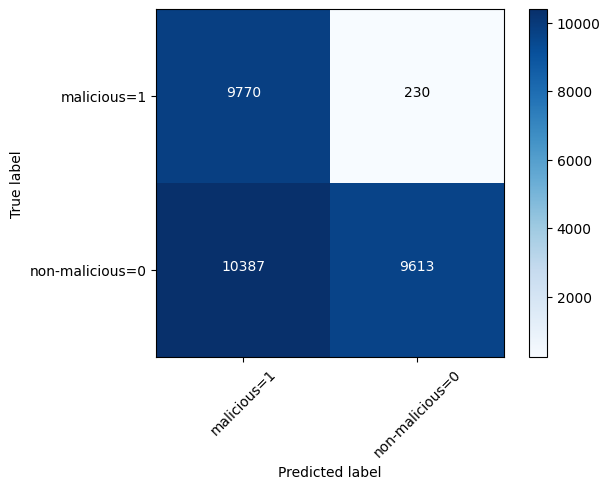


FP: 10387
TN: 9613
0.51935


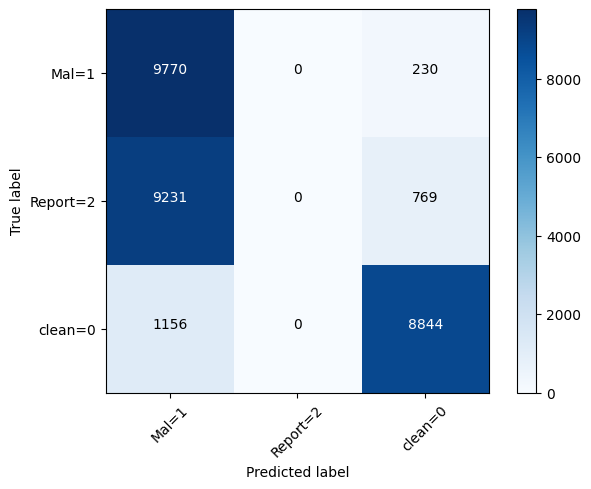

In [76]:
RF_clff = RandomForestClassifier(criterion="gini", max_features="log2",n_estimators=270, random_state=0)
# RF_clff = LogisticRegression()
# RF_clff = svm.SVC(C= 1000, kernel='rbf')
# RF_clff = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7))
# RF_clff = DecisionTreeClassifier()

for k in range(25):
    
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"].append(x_feat_),globals()[f"Baseline_y_train{k}o"].append(y_feat_))
    globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"Baseline_y_train{k}o"])
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}s"].append(x_feat_),globals()[f"Baseline_y_train{k}s"].append(y_feat_))
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}sa"],globals()[f"y_train{k}sa"])


    globals()[f"RF_y_pred{k}"] = globals()[f"RF_clff{k}"].predict(globals()[f"X_test{k}"])

for k in range(25):
    
    globals()[f"AccuracyK__{k}"] = accuracy_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]])
    globals()[f"RecallK__{k}"] = recall_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]], average='macro')
    globals()[f"PrecisionK__{k}"] = precision_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]], average='macro')
    globals()[f"F1K__{k}"] = f1_score(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]], average='macro')
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"].replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in globals()[f"RF_y_pred{k}"]],labels=[1,0])
    # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))
  
cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11

# CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in RF_y_pred0])
CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
print(plot_confusion_matrix(CM, classes=['malicious=1','non-malicious=0'],normalize= False))

TN = CM[1][1]
FN = CM[0][1]
TP = CM[0][0]
FP = CM[1][0]


print("FP:", FP)
print("TN:", TN)

fpr = FP/(FP+TN)
print(fpr)



for k in range(25):
    
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,2,0])
    # print(plot_confusion_matrix(globals()[f"Report_Phase_cmx{k}"], classes=['Report=2','non-Report=1'],normalize= False,  title='Confusion matrix'))

cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
    cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
    cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
    cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
    cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

CM = confusion_matrix(y_test0, RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[0][2] = cmx_avg02 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
CM[1][2] = cmx_avg12
CM[2][0] = cmx_avg20
CM[2][1] = cmx_avg21
CM[2][2] = cmx_avg22

print(plot_confusion_matrix(CM, classes=['Mal=1','Report=2','clean=0'],normalize= False))

multi

In [77]:
# for i in range(25):
#     # globals()[f"Baseline_y_test{i}"] = globals()[f"y_test{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 1])
#     globals()[f"Baseline_y_train{i}"] = globals()[f"y_train{i}"][['Tweet_Label']].replace([0, 1, 2],[0, 1, 2])
# Baseline_y_train24.Tweet_Label.value_counts()

In [78]:
# from sklearn.preprocessing import StandardScaler, Normalizer
# scale = StandardScaler()

# X_train_original = X_train0
# Baseline_y_train_original = Baseline_y_train0

# for k in range(25):
#     globals()[f"X_train_original{k}"] = globals()[f"X_train{k}"]
#     globals()[f"Baseline_y_train_original{k}"] = globals()[f"Baseline_y_train{k}"]
#     globals()[f"scaledX{k}"]  = scale.fit_transform(globals()[f"X_train{k}"])
#     globals()[f"X_test{k}s"] = scale.fit_transform(globals()[f"X_test{k}"])

#     from imblearn.over_sampling import SMOTE
#     oversample = SMOTE()
#     globals()[f"X_train{k}sa"], globals()[f"Baseline_y_train{k}sa"] = oversample.fit_resample(globals()[f"scaledX{k}"], globals()[f"Baseline_y_train{k}"])
#     globals()[f"X_train{k}sa"] = pd.DataFrame(globals()[f"X_train{k}sa"], columns=X_train_original.columns)


#     globals()[f"X_train{k}s"], globals()[f"Baseline_y_train{k}s"] =  globals()[f"scaledX{k}"], globals()[f"Baseline_y_train_original{k}"]
#     globals()[f"X_train{k}s"] = pd.DataFrame(globals()[f"X_train{k}s"], columns=X_train_original.columns)
#     globals()[f"X_test{k}s"] = pd.DataFrame(globals()[f"X_test{k}s"], columns=X_train_original.columns)

#     globals()[f"X_train{k}o"], globals()[f"Baseline_y_train{k}o"] =  globals()[f"X_train_original{k}"], globals()[f"Baseline_y_train_original{k}"]

C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\739081044.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit( globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\739081044.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit( globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\CVULP9CA3\AppData\Local\Temp\ipykernel_21796\739081044.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  globals()[f"RF_clff{k}"] = RF_clff.fit( globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
C:\Users\C

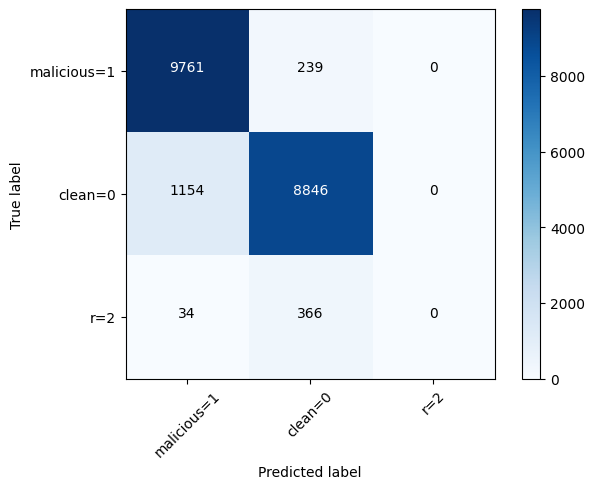

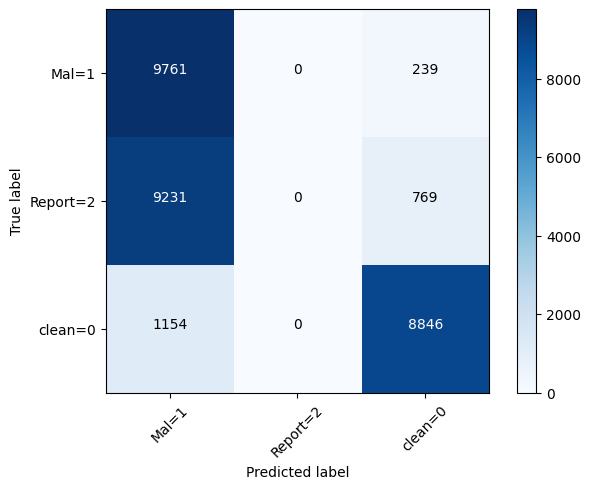

In [79]:
RF_clff = RandomForestClassifier(criterion="gini",max_features="log2", n_estimators=270, random_state=0)
# RF_clff = LogisticRegression()
# RF_clff = svm.SVC(C= 1000, kernel='rbf')
# RF_clff = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
# RF_clff = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7))
# RF_clff = DecisionTreeClassifier()

for k in range(25):
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}o"],globals()[f"y_train{k}o"])
    globals()[f"RF_clff{k}"] = RF_clff.fit( globals()[f"X_train{k}s"],globals()[f"Baseline_y_train{k}s"])
    # globals()[f"RF_clff{k}"] = RF_clff.fit(globals()[f"X_train{k}sa"],globals()[f"y_train{k}sa"])


    globals()[f"RF_y_pred{k}"] = globals()[f"RF_clff{k}"].predict(globals()[f"X_test{k}s"])

for k in range(25):
    
    globals()[f"AccuracyK_{k}"] = accuracy_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"])
    globals()[f"RecallK_{k}"] = recall_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"PrecisionK_{k}"] = precision_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"F1K_{k}"] = f1_score(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"], average='macro')
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,0,2])
    # print(plot_confusion_matrix(globals()[f"cmx{k}"], classes=['malicious=1','non-malicious=0'],normalize= False,  title='Confusion matrix'))


cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0

for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11

# CM = confusion_matrix(y_test0.replace([0, 1, 2],[0, 1, 0]), [0 if x==2 else x for x in RF_y_pred0])
CM = confusion_matrix(y_test0, RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
print(plot_confusion_matrix(CM, classes=['malicious=1','clean=0','r=2'],normalize= False))



for k in range(25):
    
    globals()[f"cmx{k}"] = confusion_matrix(globals()[f"y_test{k}"], globals()[f"RF_y_pred{k}"],labels=[1,2,0])
    # print(plot_confusion_matrix(globals()[f"Report_Phase_cmx{k}"], classes=['Report=2','non-Report=1'],normalize= False,  title='Confusion matrix'))

cmx_avg00 = 0
cmx_avg00 = 0
cmx_avg01 = 0
cmx_avg02 = 0
cmx_avg10 = 0
cmx_avg11 = 0
cmx_avg12 = 0
cmx_avg20 = 0
cmx_avg21 = 0
cmx_avg22 = 0


for i in range(25):

    cmx_avg00 = globals()[f"cmx{i}"][0][0] + cmx_avg00
    cmx_avg01 = globals()[f"cmx{i}"][0][1] + cmx_avg01
    cmx_avg02 = globals()[f"cmx{i}"][0][2] + cmx_avg02
    cmx_avg10 = globals()[f"cmx{i}"][1][0] + cmx_avg10
    cmx_avg11 = globals()[f"cmx{i}"][1][1] + cmx_avg11
    cmx_avg12 = globals()[f"cmx{i}"][1][2] + cmx_avg12
    cmx_avg20 = globals()[f"cmx{i}"][2][0] + cmx_avg20
    cmx_avg21 = globals()[f"cmx{i}"][2][1] + cmx_avg21
    cmx_avg22 = globals()[f"cmx{i}"][2][2] + cmx_avg22

CM = confusion_matrix(y_test0, RF_y_pred0)
CM[0][0] = cmx_avg00
CM[0][1] = cmx_avg01 
CM[0][2] = cmx_avg02 
CM[1][0] = cmx_avg10
CM[1][1] = cmx_avg11
CM[1][2] = cmx_avg12
CM[2][0] = cmx_avg20
CM[2][1] = cmx_avg21
CM[2][2] = cmx_avg22
print(plot_confusion_matrix(CM, classes=['Mal=1','Report=2','clean=0'],normalize= False))

To get baseline change Baseline reports from 2 to 0 and the Metric labels should have 2 underscores
To get Kamel change Baseline reports from 2 to 1 and the Metric labels should have only 1 underscore

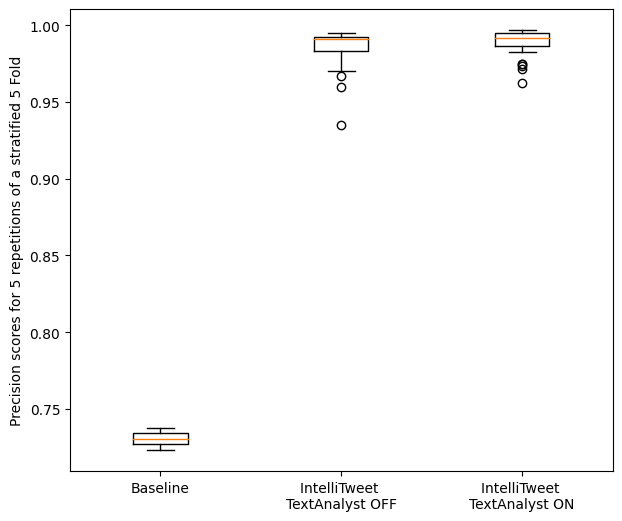

In [80]:
All_F1 = []
All_Acc = []
All_Rec = []
All_Pre = []
All__F1 = []
All__Acc = []
All__Rec = []
All__Pre = []
All_K_Acc = []
All_K_Pre = []
All_K_F1 = []
All_K_Rec = []
All_K__Acc = []
All_K__Pre = []
All_K__F1 = []
All_K__Rec = []
All_K___Acc = []
All_K___Pre = []
All_K___F1 = []
All_K___Rec = []
for i in range(25):
     All_F1.append(globals()[f"Sent_F1{i}"])
     All_Acc.append(globals()[f"Sent_Accuracy{i}"])
     All_Rec.append(globals()[f"Sent_Recall{i}"])
     All_Pre.append(globals()[f"Sent_Precision{i}"])
     All__F1.append(globals()[f"F1{i}"])
     All__Acc.append(globals()[f"Accuracy{i}"])
     All__Rec.append(globals()[f"Recall{i}"])
     All__Pre.append(globals()[f"Precision{i}"])
     
     # All_K_F1.append(globals()[f"F12{i}"])
     # All_K_Pre.append(globals()[f"Precision2{i}"])
     # All_K_Rec.append(globals()[f"Recall2{i}"])
     # All_K_Acc.append(globals()[f"Accuracy2{i}"])
     All_K__F1.append(globals()[f"F1K_{i}"])
     All_K__Pre.append(globals()[f"PrecisionK_{i}"])
     All_K__Rec.append(globals()[f"RecallK_{i}"])
     All_K__Acc.append(globals()[f"AccuracyK_{i}"])
     All_K___F1.append(globals()[f"F1K__{i}"])
     All_K___Pre.append(globals()[f"PrecisionK__{i}"])
     All_K___Rec.append(globals()[f"RecallK__{i}"])
     All_K___Acc.append(globals()[f"AccuracyK__{i}"])

import matplotlib.pyplot as plt
import numpy as np

# Combine all data into a list
all_data =  [np.asarray(All_K___Pre)] + [np.asarray(All__Pre)] + [np.asarray(All_Pre)] 
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('Data Sets')
ax.set_ylabel('Precision scores for 5 repetitions of a stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = ['Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON' ]  

ax.set_xticklabels(x_labels)

# Display the plot
plt.show()

In [81]:
print(sum(All_K___Pre) / len(All_K___Pre))
print(sum(All__Pre) / len(All__Pre))
print(sum(All_Pre) / len(All_Pre))

0.7307108226451937
0.9845255147817076
0.9880057489663312


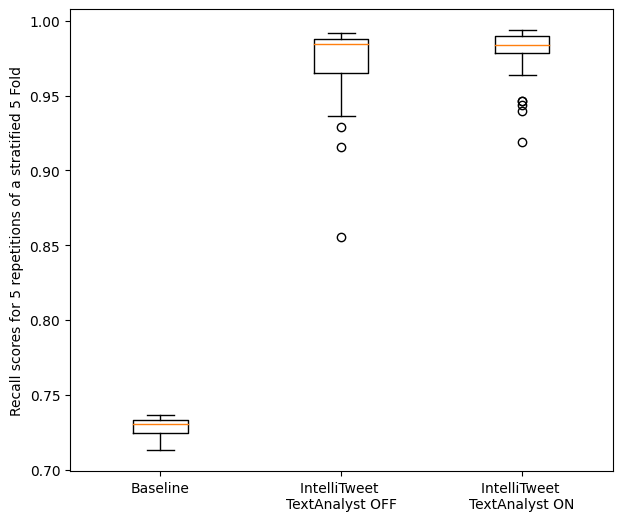

In [82]:
# Combine all data into a list
all_data = [np.asarray(All_K___Rec)] + [np.asarray(All__Rec)] + [np.asarray(All_Rec)] 
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('Data Sets')
ax.set_ylabel('Recall scores for 5 repetitions of a stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels =  ['Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON' ] 

ax.set_xticklabels(x_labels)

# Display the plot
plt.show()

In [83]:
print(sum(All_K___Rec) / len(All_K___Rec))
print(sum(All__Rec) / len(All__Rec))
print(sum(All_Rec) / len(All_Rec))

0.7288249999999998
0.9699500000000001
0.9762


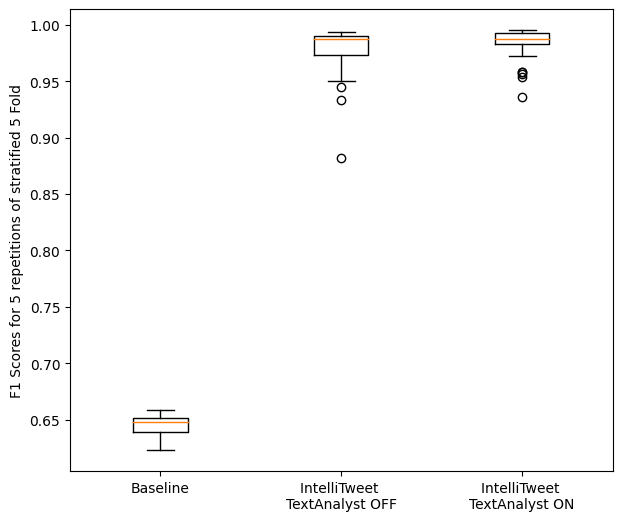

In [84]:
all_data = [np.asarray(All_K___F1)] + [np.asarray(All__F1)] + [np.asarray(All_F1)]
fig, ax = plt.subplots(figsize=(7, 6))
ax.boxplot(all_data)
ax.set_ylabel('F1 Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')
x_labels = ['Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON' ] 
ax.set_xticklabels(x_labels)
plt.show()

In [85]:
print(sum(All_K___F1) / len(All_K___F1))
print(sum(All__F1) / len(All__F1))
print(sum(All_F1) / len(All_F1))

0.6460647896857149
0.9760631787088597
0.9814983268081063


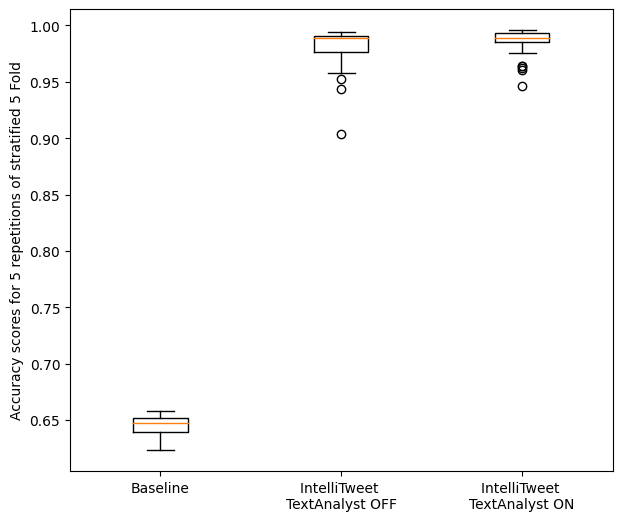

In [86]:
all_data = [np.asarray(All_K___Acc)] + [np.asarray(All__Acc)]+ [np.asarray(All_Acc)]
fig, ax = plt.subplots(figsize=(7, 6))
ax.boxplot(all_data)
ax.set_ylabel('Accuracy scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')
x_labels = ['Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON' ] 
ax.set_xticklabels(x_labels)
plt.show()

In [87]:
print(sum(All_K___Acc) / len(All_K___Acc))
print(sum(All__Acc) / len(All__Acc))
print(sum(All_Acc) / len(All_Acc))

0.6460999999999999
0.9794333333333334
0.9839000000000001


In [88]:
# All_F1 = []
# All_Acc = []
# All_Rec = []
# All_Pre = []
# All__F1 = []
# All__Acc = []
# All__Rec = []
# All__Pre = []
# All_K_Acc = []
# All_K_Pre = []
# All_K_F1 = []
# All_K_Rec = []
# All_K__Acc = []
# All_K__Pre = []
# All_K__F1 = []
# All_K__Rec = []
# All_K___Acc = []
# All_K___Pre = []
# All_K___F1 = []
# All_K___Rec = []
# for i in range(25):
#      All_F1.append(globals()[f"Sent_F1{i}"])
#      All_Acc.append(globals()[f"Sent_Accuracy{i}"])
#      All_Rec.append(globals()[f"Sent_Recall{i}"])
#      All_Pre.append(globals()[f"Sent_Precision{i}"])
#      All__Acc.append(globals()[f"Accuracy{i}"])
#      All__Rec.append(globals()[f"Recall{i}"])
#      All__Pre.append(globals()[f"Precision{i}"])
#      All__F1.append(globals()[f"F1{i}"])
#      # All_K_F1.append(globals()[f"F12{i}"])
#      # All_K_Pre.append(globals()[f"Precision2{i}"])
#      # All_K_Rec.append(globals()[f"Recall2{i}"])
#      # All_K_Acc.append(globals()[f"Accuracy2{i}"])
#      All_K__F1.append(globals()[f"F1_{i}"])
#      All_K__Pre.append(globals()[f"Precision2_{i}"])
#      All_K__Rec.append(globals()[f"Recall2_{i}"])
#      All_K__Acc.append(globals()[f"Accuracy2_{i}"])
#      All_K___F1.append(globals()[f"F12__{i}"])
#      All_K___Pre.append(globals()[f"Precision2__{i}"])
#      All_K___Rec.append(globals()[f"Recall2__{i}"])
#      All_K___Acc.append(globals()[f"Accuracy2__{i}"])


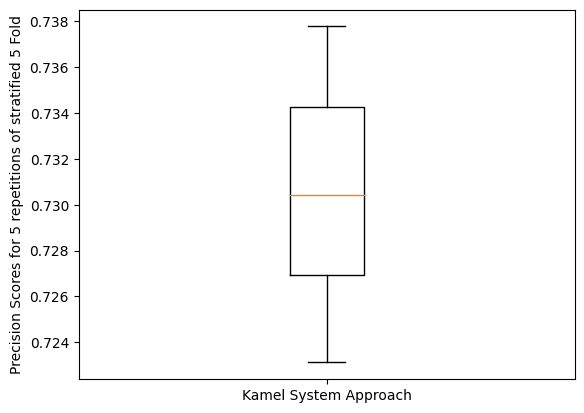

In [89]:
all_data = [np.asarray(All_K___Pre)] 
# all_data = [np.asarray(All_Acc)] + [np.asarray(All__Acc)] + [np.asarray(All_K___Acc)] 
# + [np.asarray(All_K__Pre)]
# Create a figure and axis
fig, ax = plt.subplots()

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('Data Sets')
ax.set_ylabel('Precision Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Box Plot ')

# Set x-axis tick labels
x_labels = ['Kamel System Approach'] 

ax.set_xticklabels(x_labels)

# Display the plot
plt.show()

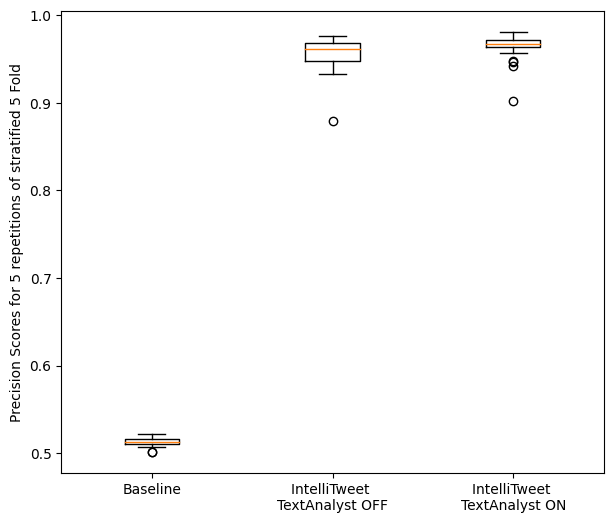

In [90]:
All__Multi_F1 = []
All__Multi_Acc = []
All__Multi_Rec = []
All__Multi_Pre = []
All_Multi_F13 = []
All_Multi_Acc3 = []
All_Multi_Rec3 = []
All_Multi_Pre3 = []
All_K_Acc = []
All_K_Pre = []
All_K_F1 = []
All_K_Rec = []
All_Kamel_multi__Acc = []
All_Kamel_multi__Pre = []
All_Kamel_multi__F1 = []
All_Kamel_multi__Rec = []
for i in range(25):
     All_Multi_F13.append(globals()[f"F13_{i}"])
     All_Multi_Acc3.append(globals()[f"Accuracy3_{i}"])
     All_Multi_Rec3.append(globals()[f"Recall3_{i}"])
     All_Multi_Pre3.append(globals()[f"Precision3_{i}"])
     All__Multi_F1.append(globals()[f"F12_{i}"])
     All__Multi_Acc.append(globals()[f"Accuracy2_{i}"])
     All__Multi_Rec.append(globals()[f"Recall2_{i}"])
     All__Multi_Pre.append(globals()[f"Precision2_{i}"])
     
     All_K_F1.append(globals()[f"F1K__{i}"])
     All_K_Pre.append(globals()[f"PrecisionK__{i}"])
     All_K_Rec.append(globals()[f"RecallK__{i}"])
     All_K_Acc.append(globals()[f"AccuracyK__{i}"])
     All_Kamel_multi__F1.append(globals()[f"F1K_{i}"])
     All_Kamel_multi__Pre.append(globals()[f"PrecisionK_{i}"])
     All_Kamel_multi__Rec.append(globals()[f"RecallK_{i}"])
     All_Kamel_multi__Acc.append(globals()[f"AccuracyK_{i}"])

import matplotlib.pyplot as plt
import numpy as np

# Combine all data into a list
all_data = [np.asarray(All_Kamel_multi__F1)] + [np.asarray(All__Multi_F1)] +  [np.asarray(All_Multi_F13)] 
# all_data = [np.asarray(All_Kamel_multi__Pre)] + [np.asarray(All__Multi_Pre)] +  [np.asarray(All_Multi_Pre3)] 
# all_data = [np.asarray(All_Kamel_multi__Rec)] + [np.asarray(All__Multi_Rec)] +  [np.asarray(All_Multi_Rec3)] 
# all_data = [np.asarray(All_Kamel_multi__Acc)] + [np.asarray(All__Multi_Acc)] +  [np.asarray(All_Multi_Acc3)] 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Precision Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = ['Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

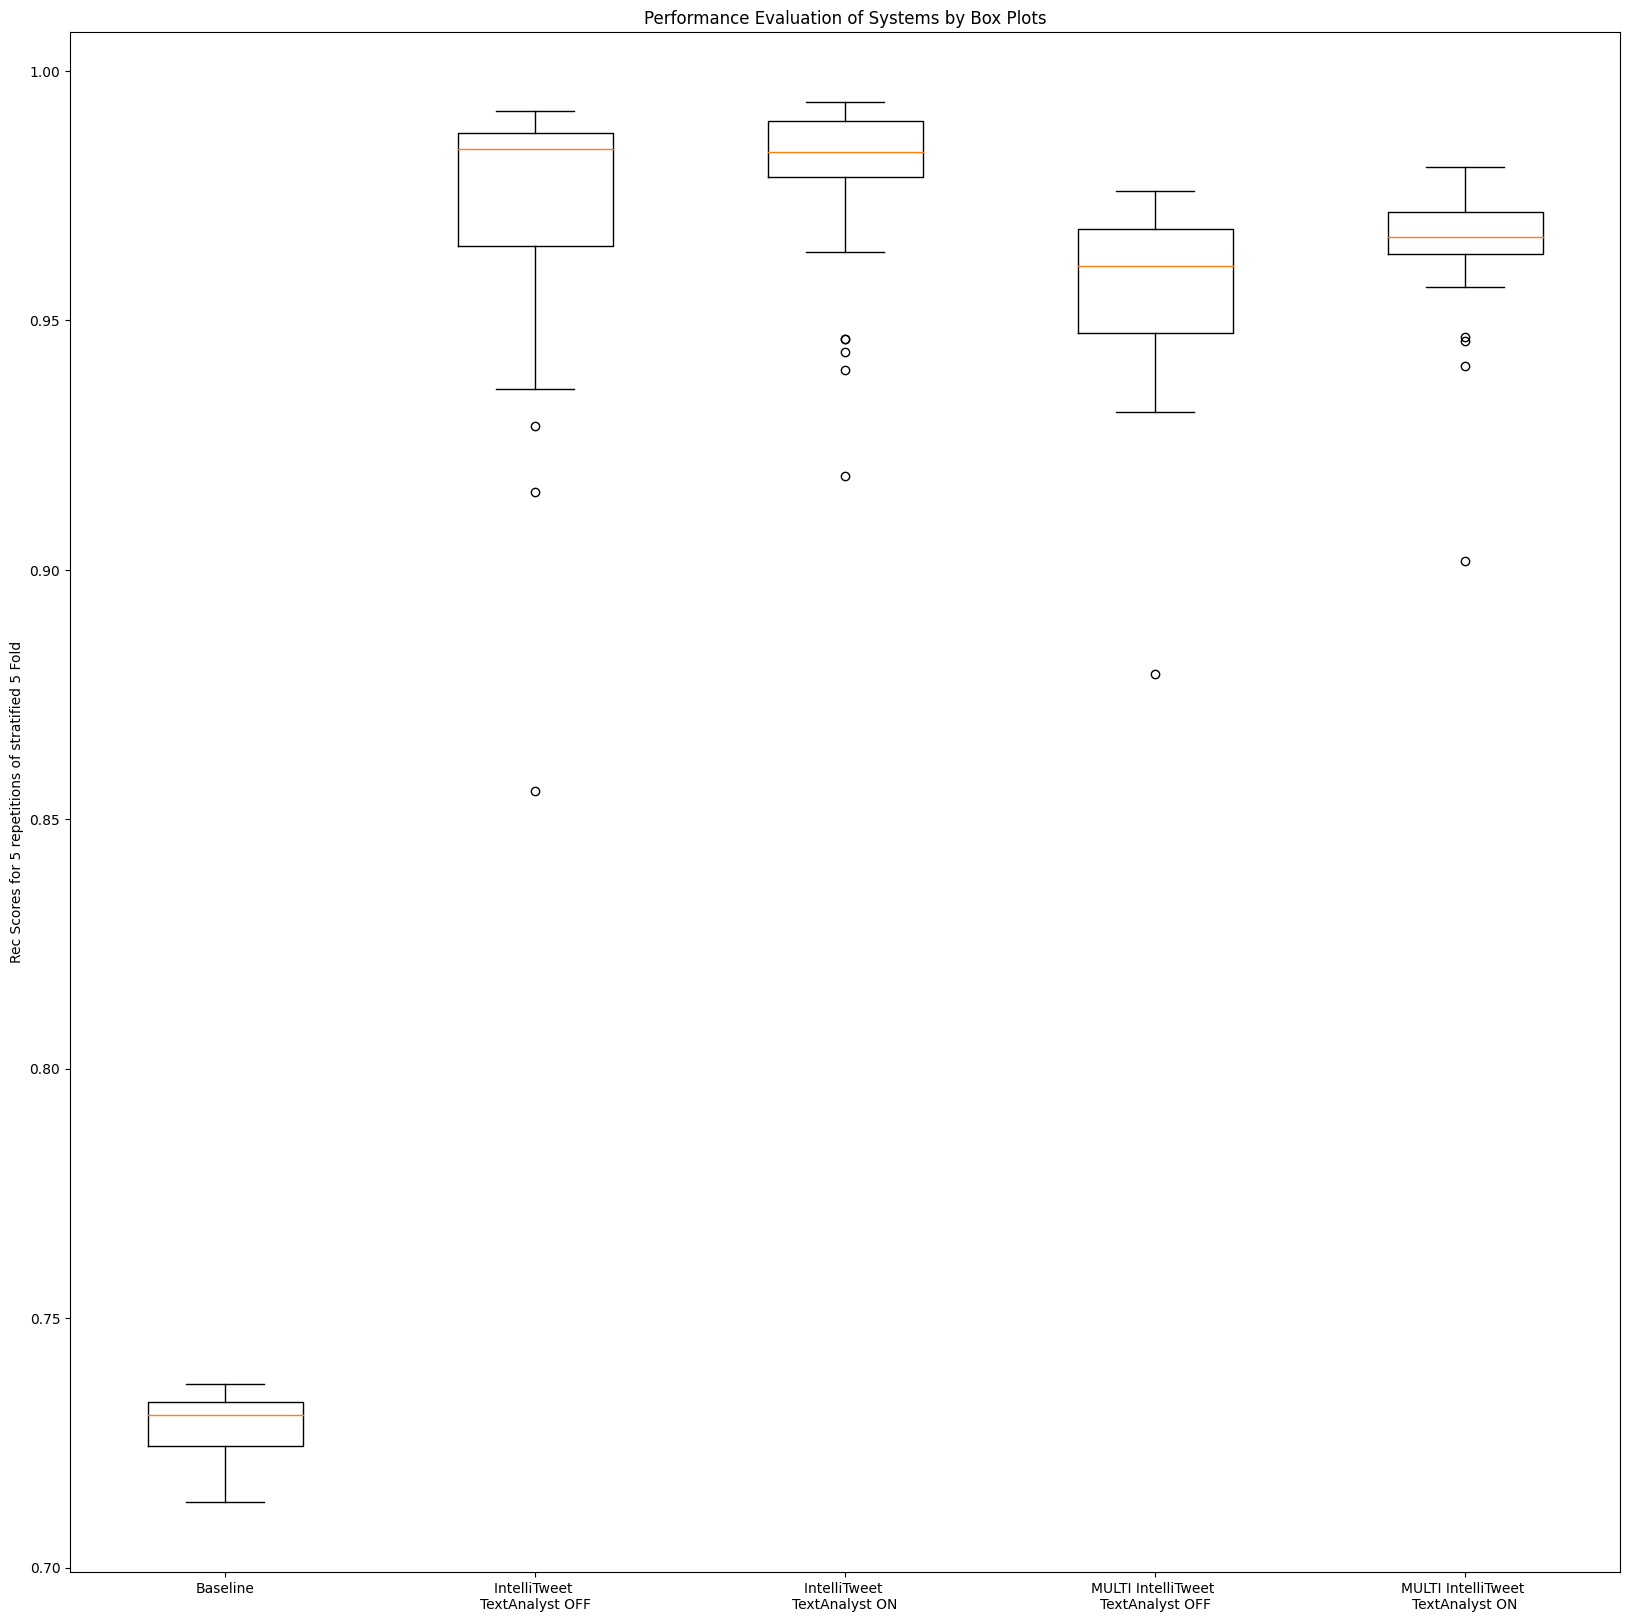

In [91]:

All_F1 = []
All_Acc = []
All_Rec = []
All_Pre = []
All__F1 = []
All__Acc = []
All__Rec = []
All__Pre = []

All_K_Acc = []
All_K_Pre = []
All_K_F1 = []
All_K_Rec = []

All__Multi_F1 = []
All__Multi_Acc = []
All__Multi_Rec = []
All__Multi_Pre = []
All_Multi_F13 = []
All_Multi_Acc3 = []
All_Multi_Rec3 = []
All_Multi_Pre3 = []

All_K_Acc = []
All_K_Pre = []
All_K_F1 = []
All_K_Rec = []
All_Kamel_multi__Acc = []
All_Kamel_multi__Pre = []
All_Kamel_multi__F1 = []
All_Kamel_multi__Rec = []
for i in range(25):
     All_Multi_F13.append(globals()[f"F13_{i}"])
     All_Multi_Acc3.append(globals()[f"Accuracy3_{i}"])
     All_Multi_Rec3.append(globals()[f"Recall3_{i}"])
     All_Multi_Pre3.append(globals()[f"Precision3_{i}"])
     All__Multi_F1.append(globals()[f"F12_{i}"])
     All__Multi_Acc.append(globals()[f"Accuracy2_{i}"])
     All__Multi_Rec.append(globals()[f"Recall2_{i}"])
     All__Multi_Pre.append(globals()[f"Precision2_{i}"])
     
     All_K_F1.append(globals()[f"F1K__{i}"])
     All_K_Pre.append(globals()[f"PrecisionK__{i}"])
     All_K_Rec.append(globals()[f"RecallK__{i}"])
     All_K_Acc.append(globals()[f"AccuracyK__{i}"])
     All_Kamel_multi__F1.append(globals()[f"F1K_{i}"])
     All_Kamel_multi__Pre.append(globals()[f"PrecisionK_{i}"])
     All_Kamel_multi__Rec.append(globals()[f"RecallK_{i}"])
     All_Kamel_multi__Acc.append(globals()[f"AccuracyK_{i}"])

     All_F1.append(globals()[f"Sent_F1{i}"])
     All_Acc.append(globals()[f"Sent_Accuracy{i}"])
     All_Rec.append(globals()[f"Sent_Recall{i}"])
     All_Pre.append(globals()[f"Sent_Precision{i}"])
     All__F1.append(globals()[f"F1{i}"])
     All__Acc.append(globals()[f"Accuracy{i}"])
     All__Rec.append(globals()[f"Recall{i}"])
     All__Pre.append(globals()[f"Precision{i}"])
     
     # All_K_F1.append(globals()[f"F12{i}"])
     # All_K_Pre.append(globals()[f"Precision2{i}"])
     # All_K_Rec.append(globals()[f"Recall2{i}"])
     # All_K_Acc.append(globals()[f"Accuracy2{i}"])

import matplotlib.pyplot as plt
import numpy as np

# Combine all data into a list
all_data = [np.asarray(All_K_Rec)]+ [np.asarray(All__Rec)] + [np.asarray(All_Rec)]+ [np.asarray(All__Multi_Rec)] +  [np.asarray(All_Multi_Rec3)] 
# 
# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Rec Scores for 5 repetitions of stratified 5 Fold')
ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON', 'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

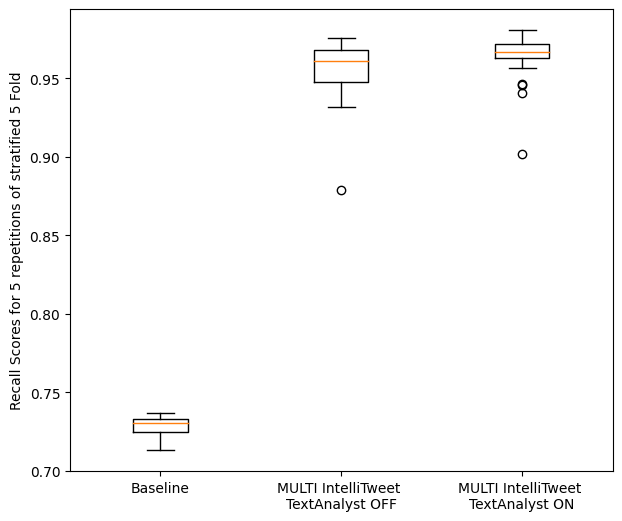

In [92]:
all_data = [np.asarray(All_K_Rec)] + [np.asarray(All__Multi_Rec)] +  [np.asarray(All_Multi_Rec3)] 
# 
# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Recall Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline',  'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

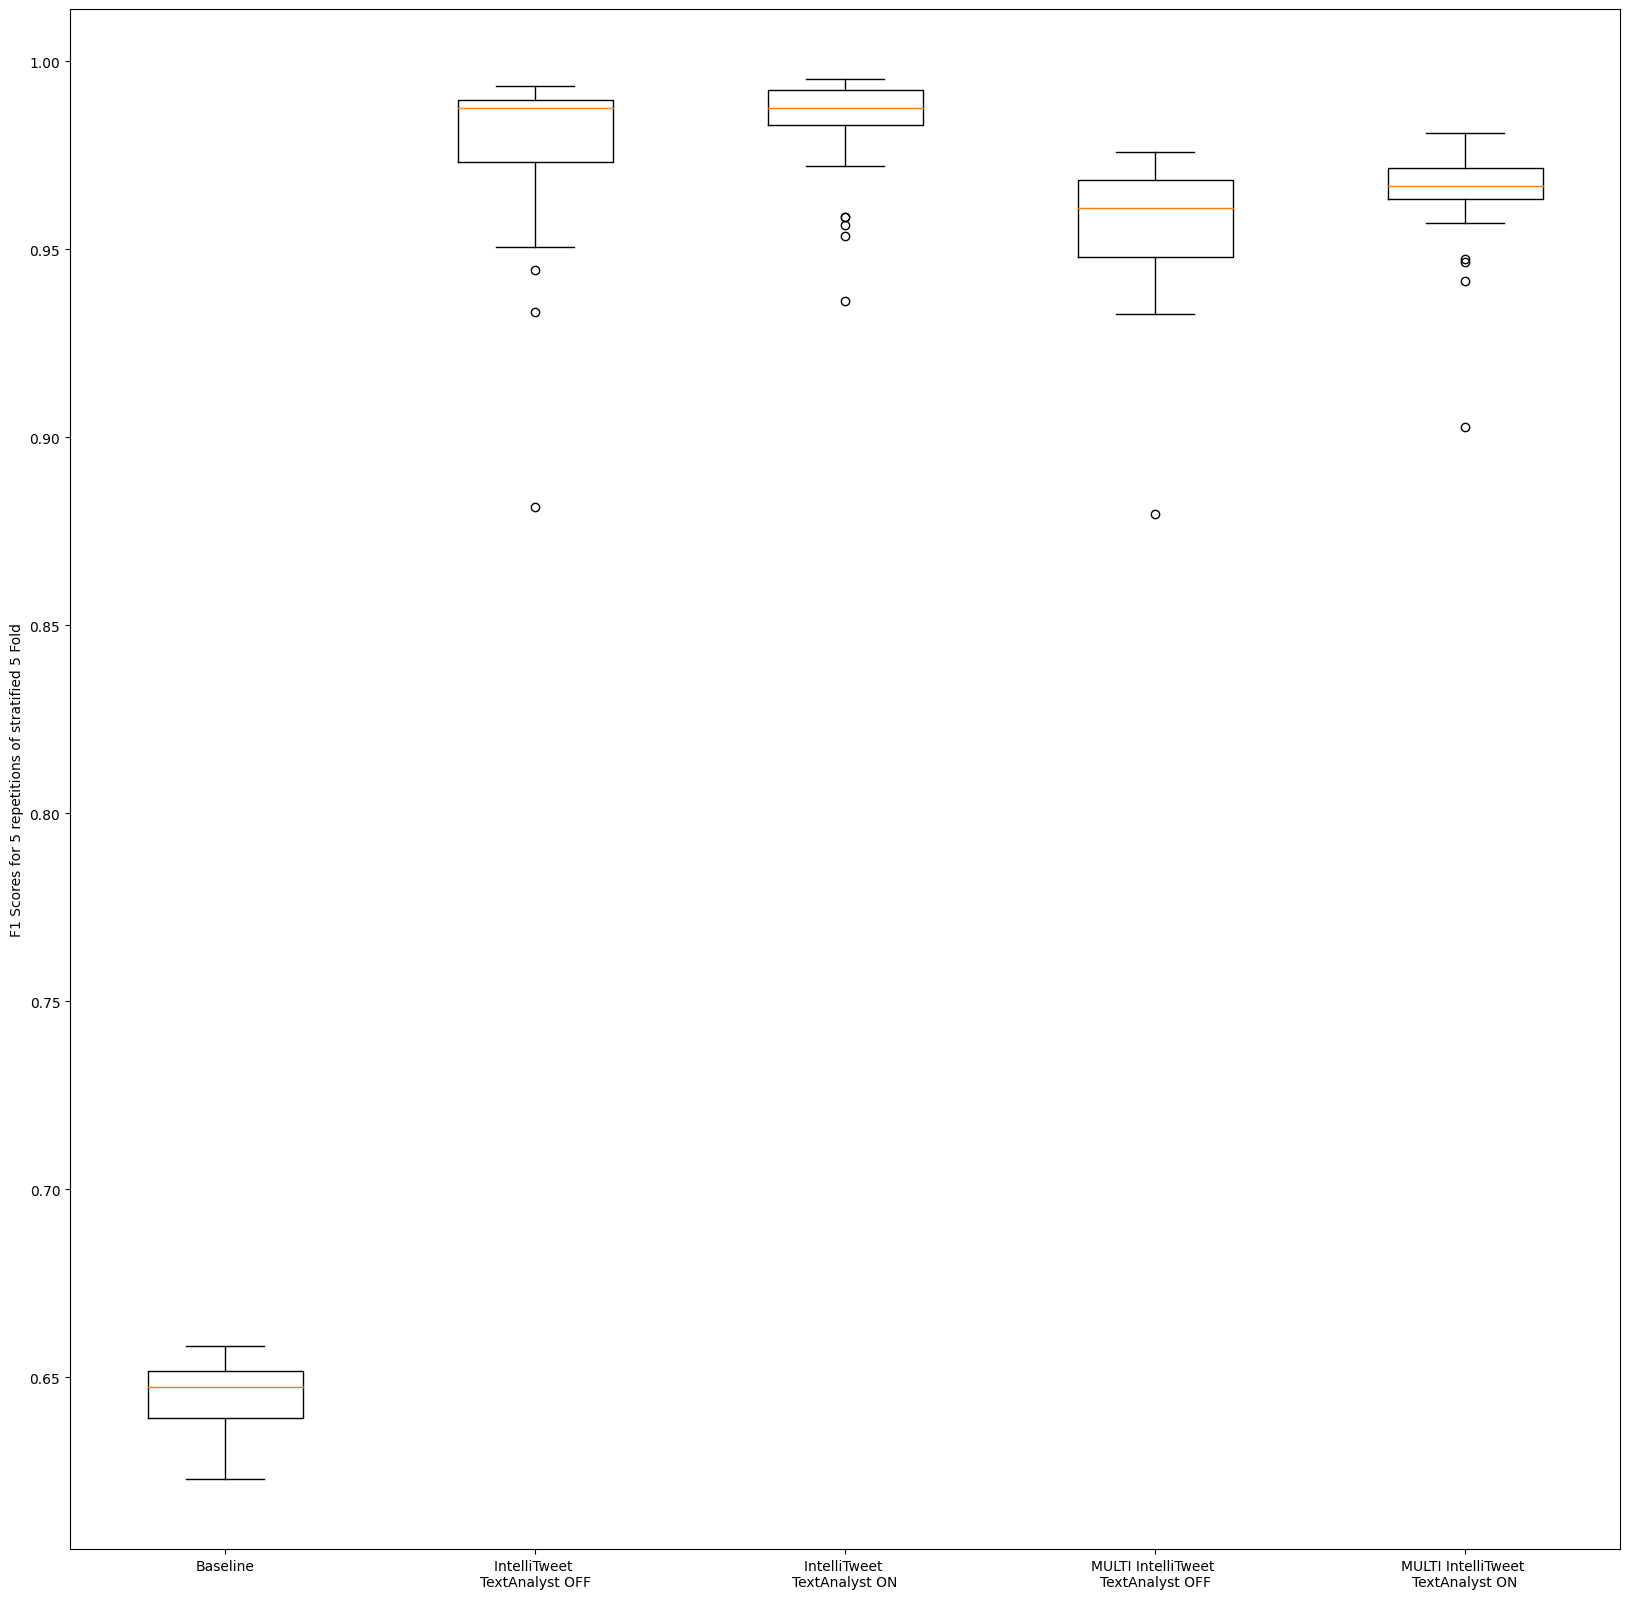

In [93]:
all_data =  [np.asarray(All_K_F1)] + [np.asarray(All__F1)] + [np.asarray(All_F1)]+ [np.asarray(All__Multi_F1)] +  [np.asarray(All_Multi_F13)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('F1 Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON', 'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

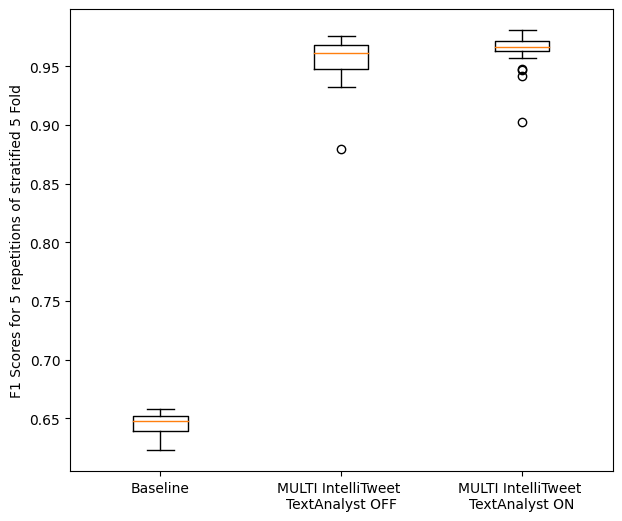

In [94]:
all_data =  [np.asarray(All_K_F1)] + [np.asarray(All__Multi_F1)] +  [np.asarray(All_Multi_F13)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('F1 Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline', 'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

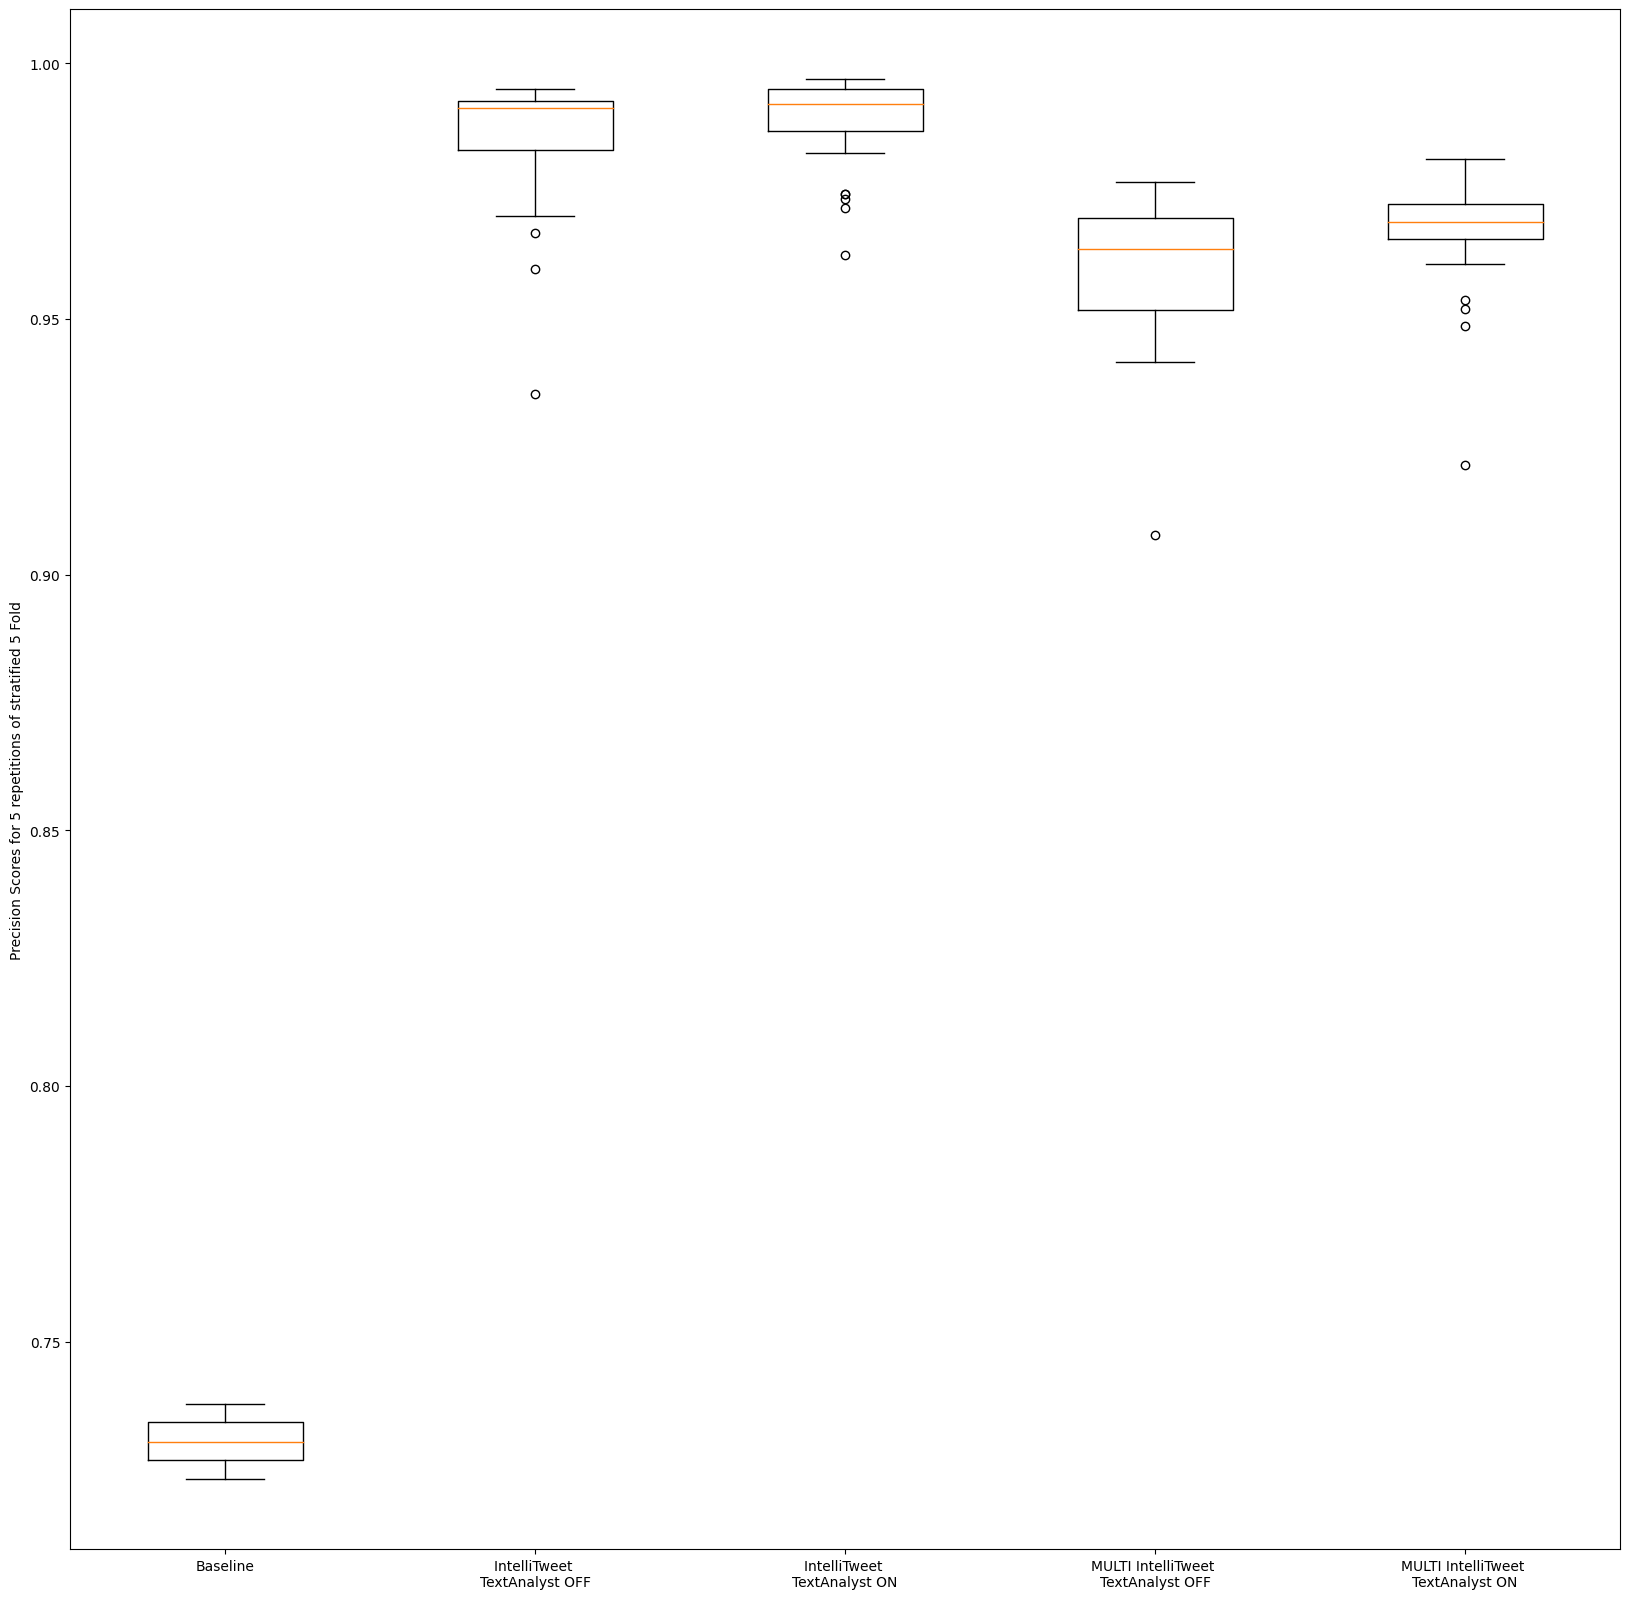

In [95]:
all_data = [np.asarray(All_K_Pre)] + [np.asarray(All__Pre)] + [np.asarray(All_Pre)]+ [np.asarray(All__Multi_Pre)] +  [np.asarray(All_Multi_Pre3)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Precision Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON', 'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

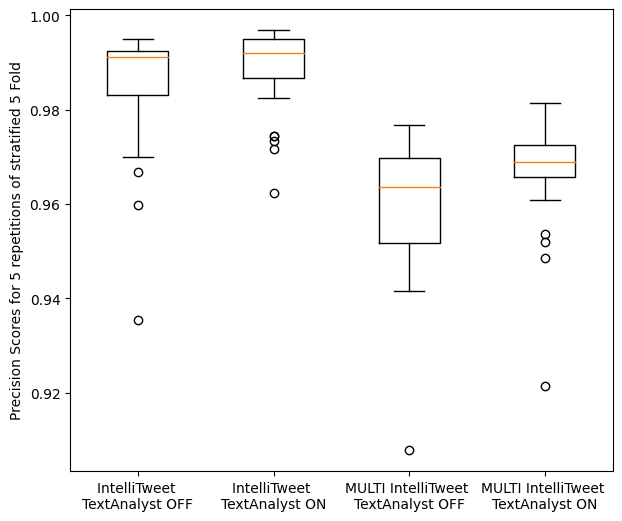

In [96]:
all_data = [np.asarray(All__Pre)] + [np.asarray(All_Pre)]+ [np.asarray(All__Multi_Pre)] +  [np.asarray(All_Multi_Pre3)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Precision Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title()

# Set x-axis tick labels
x_labels = [ 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON', 'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

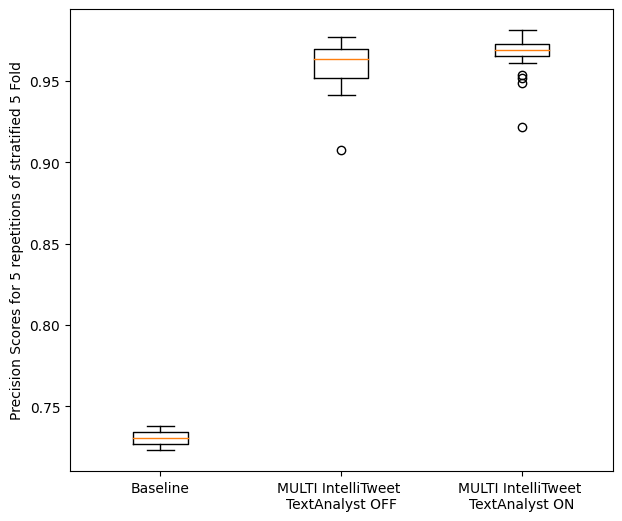

In [97]:
all_data = [np.asarray(All_K_Pre)] + [np.asarray(All__Multi_Pre)] +  [np.asarray(All_Multi_Pre3)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Precision Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline',  'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

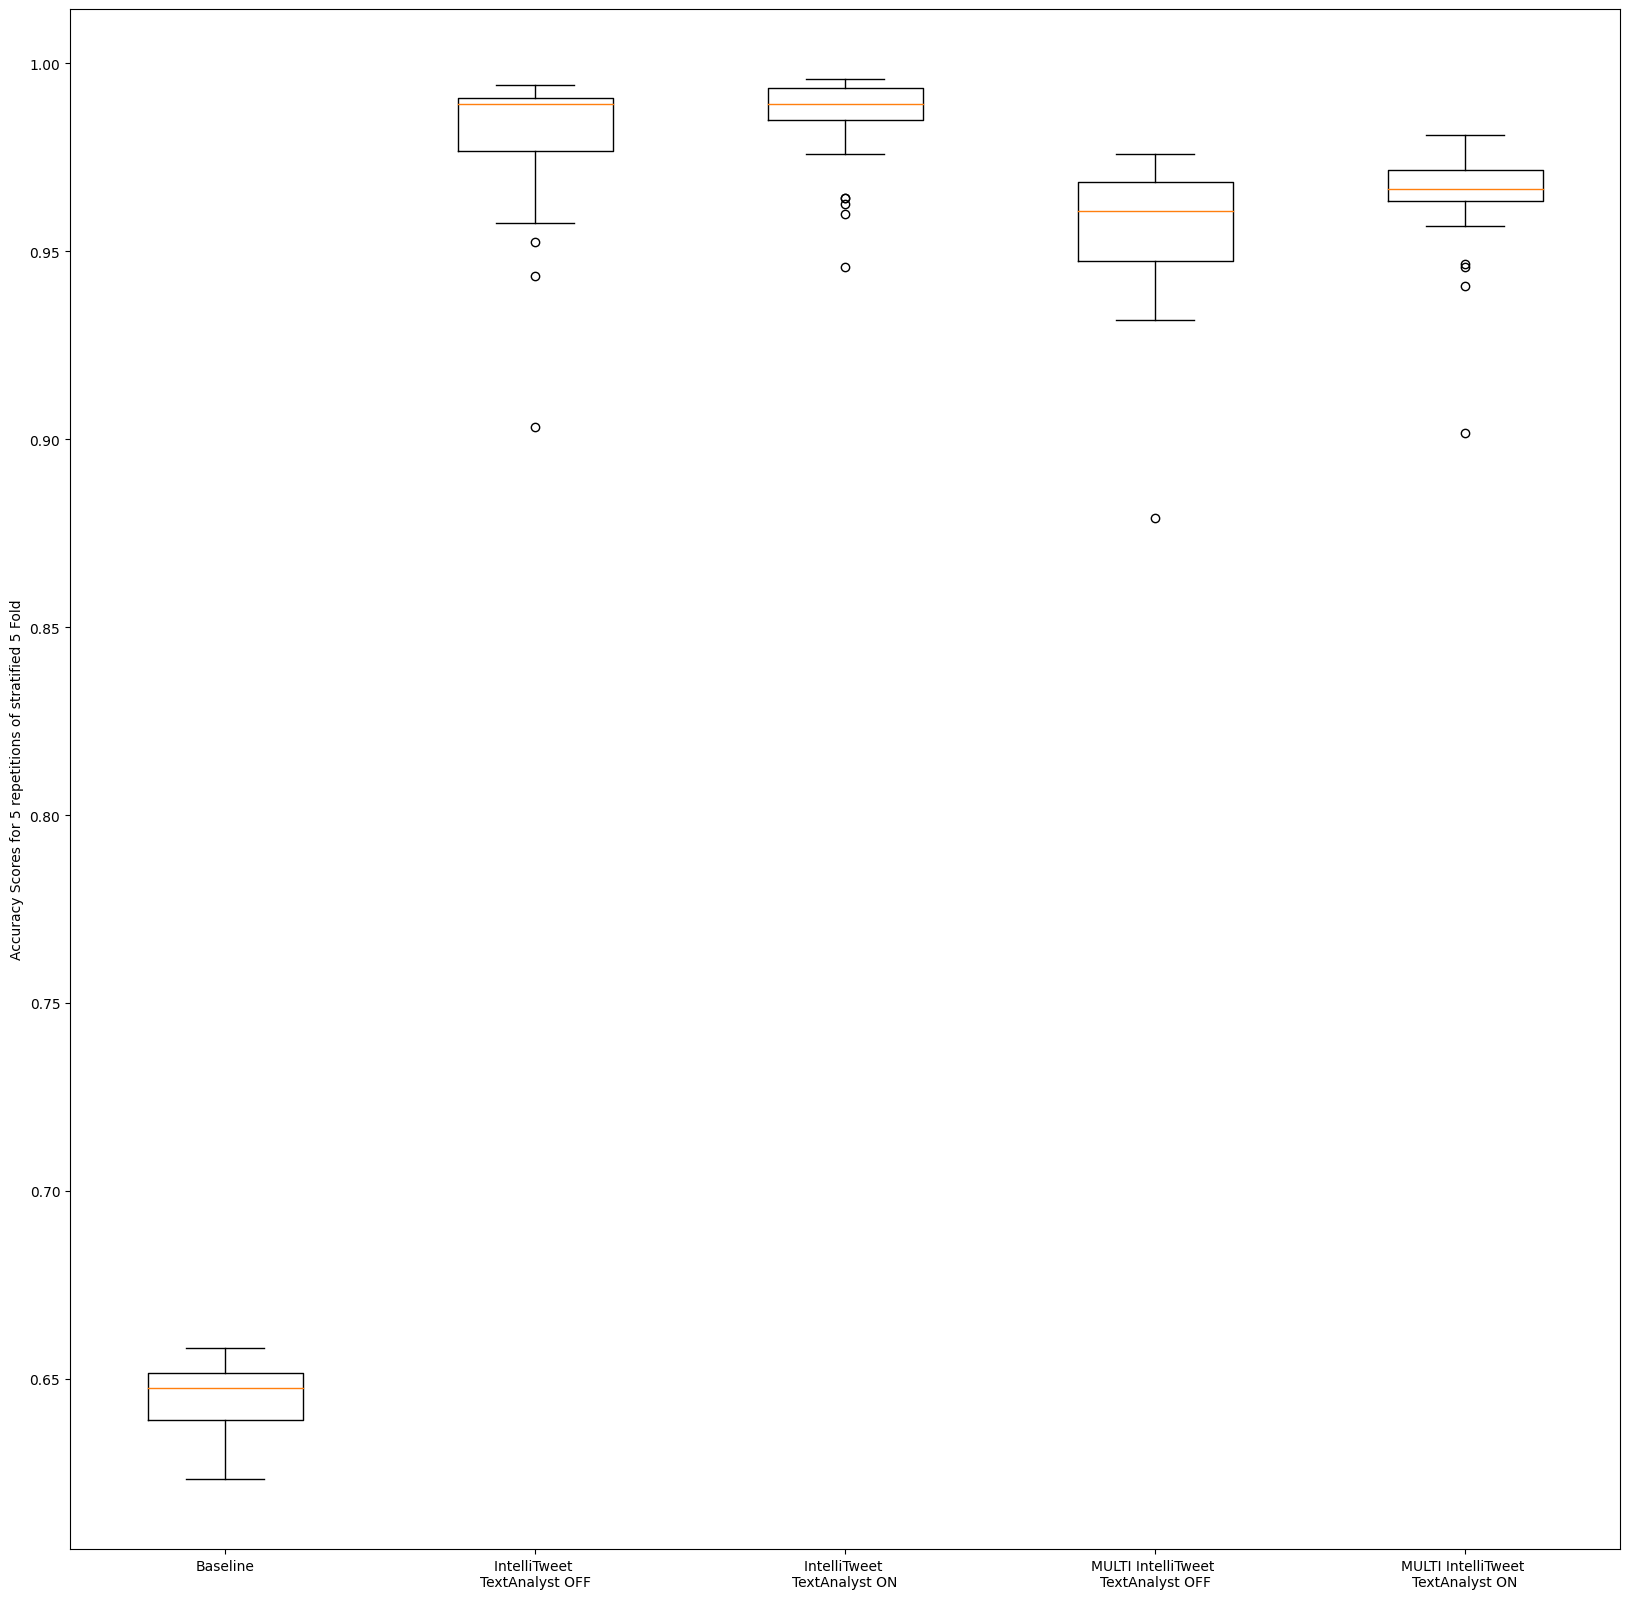

In [98]:
all_data = [np.asarray(All_K_Acc)] + [np.asarray(All__Acc)] + [np.asarray(All_Acc)]+ [np.asarray(All__Multi_Acc)] +  [np.asarray(All_Multi_Acc3)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Accuracy Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline', 'IntelliTweet \nTextAnalyst OFF', 'IntelliTweet \nTextAnalyst ON', 'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

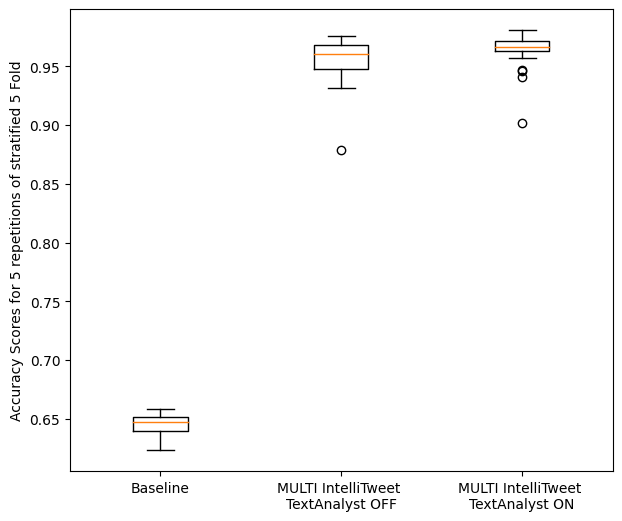

In [99]:
all_data = [np.asarray(All_K_Acc)] + [np.asarray(All__Multi_Acc)] +  [np.asarray(All_Multi_Acc3)] 

# [np.asarray(All_Kamel_multi__Acc)] +
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create box plots for all data
ax.boxplot(all_data)

# Set labels and title
# ax.set_xlabel('\nSystems')
ax.set_ylabel('Accuracy Scores for 5 repetitions of stratified 5 Fold')
# ax.set_title('Performance Evaluation of Systems by Box Plots')

# Set x-axis tick labels
x_labels = [ 'Baseline',  'MULTI IntelliTweet \nTextAnalyst OFF', 'MULTI IntelliTweet \nTextAnalyst ON' ]

ax.set_xticklabels(x_labels, wrap=True)
# plt.xticks(rotation=-10)
# Display the plot
plt.show()

PAIRED T-TEST

In [101]:
import pandas as pd

# Precision values for the binary system without Text Analyst
binary_system_data_without_TA = [0.9883, 0.9806, 0.9859, 0.9853, 0.9825]
				
# Precision values for the binary system with Text Analyst
binary_system_data_with_TA = [0.9888, 0.9869, 0.9875, 0.9882, 0.9886]

# Precision values for the multi-system without Text Analyst
multi_system_data_without_TA = [0.9615, 0.9550,	0.9607,	0.9632,	0.9586]

# Precision values for the multi-system with Text Analyst
multi_system_data_with_TA = [0.9649, 0.9615, 0.9698,0.9664, 0.9687]

# Compute average and standard deviation
avg_binary_without_TA = sum(binary_system_data_without_TA) / len(binary_system_data_without_TA)
stddev_binary_without_TA = pd.Series(binary_system_data_without_TA).std()

avg_binary_with_TA = sum(binary_system_data_with_TA) / len(binary_system_data_with_TA)
stddev_binary_with_TA = pd.Series(binary_system_data_with_TA).std()

avg_multi_without_TA = sum(multi_system_data_without_TA) / len(multi_system_data_without_TA)
stddev_multi_without_TA = pd.Series(multi_system_data_without_TA).std()

avg_multi_with_TA = sum(multi_system_data_with_TA) / len(multi_system_data_with_TA)
stddev_multi_with_TA = pd.Series(multi_system_data_with_TA).std()

# Create DataFrame
table = {
    "binary_system_data_without_TA": binary_system_data_without_TA + [avg_binary_without_TA, stddev_binary_without_TA],
    "binary_system_data_with_TA": binary_system_data_with_TA + [avg_binary_with_TA, stddev_binary_with_TA],
    "multi_system_data_without_TA": multi_system_data_without_TA + [avg_multi_without_TA, stddev_multi_without_TA],
    "multi_system_data_with_TA": multi_system_data_with_TA + [avg_multi_with_TA, stddev_multi_with_TA]
}

df = pd.DataFrame(table, 
                  columns=["binary_system_data_without_TA", "binary_system_data_with_TA", 
                           "multi_system_data_without_TA", "multi_system_data_with_TA"],
                  index=[0,1,2,3,4,"avg", "stddev"])

df

,binary_system_data_without_TA,binary_system_data_with_TA,multi_system_data_without_TA,multi_system_data_with_TA
0,0.98830,0.988800,0.961500,0.964900
1,0.98060,0.986900,0.955000,0.961500
2,0.98590,0.987500,0.960700,0.969800
3,0.98530,0.988200,0.963200,0.966400
4,0.98250,0.988600,0.958600,0.968700
avg,0.98452,0.988000,0.959800,0.966260
stddev,0.00301,0.000791,0.003152,0.003279


In [102]:

from scipy import stats
import numpy as np

# Precision values for each model
precision_binary_without_TA = np.array([0.9883, 0.9806, 0.9859, 0.9853, 0.9825])
precision_binary_with_TA = np.array([0.9888, 0.98689, 0.9875, 0.9882, 0.9886])
precision_multi_without_TA = np.array([0.961477, 0.9550,	0.9607,	0.9632,	0.9586])
precision_multi_with_TA = np.array([0.9649, 0.9615, 0.9698,0.9664, 0.9687])

# Calculate paired differences
table_paired = np.concatenate((
            precision_binary_without_TA.reshape(5,1) - precision_binary_with_TA.reshape(5,1),
            precision_binary_with_TA.reshape(5,1) - precision_multi_without_TA.reshape(5,1), 
            precision_multi_without_TA.reshape(5,1) - precision_multi_with_TA.reshape(5,1), 
            precision_multi_with_TA.reshape(5,1) - precision_binary_without_TA.reshape(5,1)), axis=1)

# Function to compute p-value
def p_value(lst):
    t = (np.mean(lst))/(lst.std(ddof=1)/np.sqrt(len(lst)))
    p = stats.t.cdf(t, df=len(lst)-1)
    return 2 * min(p, 1 - p)

# Calculate mean, standard deviation, and p-values
means = table_paired.mean(axis=0).reshape(1,4)
stds = table_paired.std(axis=0).reshape(1,4)
p_values = np.apply_along_axis(p_value, 0, table_paired).reshape(1,4)

# Add mean, standard deviation, and p-values to the table
table_paired = np.concatenate((table_paired, means, stds, p_values), axis=0)

# Display the table
print(table_paired)


import pandas as pd

# Create a DataFrame with correct column names
df = pd.DataFrame(
        table_paired, 
        columns=["Binary without TA - Binary with TA", "Binary with TA - Multi without TA", "Multi without TA - Multi with TA", "Multi with TA - Binary without TA" ],
        index=[0,1,2,3,4,"avg", "stddev","p-value"])

# Display the DataFrame
df

[[-5.00000000e-04  2.73230000e-02 -3.42300000e-03 -2.34000000e-02]
 [-6.29000000e-03  3.18900000e-02 -6.50000000e-03 -1.91000000e-02]
 [-1.60000000e-03  2.68000000e-02 -9.10000000e-03 -1.61000000e-02]
 [-2.90000000e-03  2.50000000e-02 -3.20000000e-03 -1.89000000e-02]
 [-6.10000000e-03  3.00000000e-02 -1.01000000e-02 -1.38000000e-02]
 [-3.47800000e-03  2.82026000e-02 -6.46460000e-03 -1.82600000e-02]
 [ 2.34570586e-03  2.44234294e-03  2.83095967e-03  3.22775464e-03]
 [ 4.13316025e-02  2.08301461e-05  1.02835596e-02  3.47812526e-04]]


,Binary without TA - Binary with TA,Binary with TA - Multi without TA,Multi without TA - Multi with TA,Multi with TA - Binary without TA
0,-0.000500,0.027323,-0.003423,-0.023400
1,-0.006290,0.031890,-0.006500,-0.019100
2,-0.001600,0.026800,-0.009100,-0.016100
3,-0.002900,0.025000,-0.003200,-0.018900
4,-0.006100,0.030000,-0.010100,-0.013800
avg,-0.003478,0.028203,-0.006465,-0.018260
stddev,0.002346,0.002442,0.002831,0.003228
p-value,0.041332,0.000021,0.010284,0.000348


In [ ]:
BERT ADDITIONS

In [ ]:
# Tweet_data1 = pd.read_csv("Modular_Setup\Model_Selection_Experiment_data.csv ")
bert_intent_train4 = pd.read_csv("Modular_Setup\Text_Analyst_data.csv")

In [ ]:
bert_intent_train4['Tweet_Label'].value_counts()

In [ ]:
bert_intent_train4['Tweet_Label'] = bert_intent_train4['Tweet_Label'].astype(int)

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from sklearn.model_selection import train_test_split

# Define intent labels
intent_labels = ['0', '1', '2']  # Add your intent labels

# Load and preprocess the training data
def load_data():
    # Load and preprocess your training data
    return list(zip(bert_intent_train4["Full_Text"], bert_intent_train4['Tweet_Label']))

# Prepare the training and validation datasets
def prepare_datasets():
    data = load_data()
    texts, intents = zip(*data)
    train_texts, val_texts, train_intents, val_intents = train_test_split(texts, intents, test_size=0.2, random_state=42)
    return train_texts, val_texts, train_intents, val_intents

# Tokenize the text data
def tokenize_texts(texts):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
    return tokenized_texts

# Create DataLoader for training and validation datasets
def create_data_loaders(train_texts, val_texts, train_intents, val_intents, batch_size=32):
    train_tokenized_texts = tokenize_texts(train_texts)
    val_tokenized_texts = tokenize_texts(val_texts)

    train_dataset = torch.utils.data.TensorDataset(train_tokenized_texts['input_ids'], 
                                                  train_tokenized_texts['attention_mask'],
                                                  torch.tensor(train_intents))
    val_dataset = torch.utils.data.TensorDataset(val_tokenized_texts['input_ids'], 
                                                val_tokenized_texts['attention_mask'],
                                                torch.tensor(val_intents))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader

# Train the intent model
def train_intent_model(train_loader, val_loader, intent_labels):
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(intent_labels))
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    optimizer = AdamW(model.parameters(), lr=2e-5)
    num_epochs = 3

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for input_ids, attention_mask, intents in train_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            intents = intents.to(device)
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=intents)
            loss = outputs.loss
            train_loss += loss.item()
            loss.backward()
            optimizer.step()
        
        model.eval()
        val_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for input_ids, attention_mask, intents in val_loader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                intents = intents.to(device)
                outputs = model(input_ids, attention_mask=attention_mask, labels=intents)
                loss = outputs.loss
                val_loss += loss.item()
                logits = outputs.logits
                _, predicted_labels= torch.max(logits, dim=1)
                correct_predictions += (predicted_labels == intents).sum().item()
                total_predictions += len(intents)


        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        accuracy = correct_predictions / total_predictions * 100

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}')
        print(f'Val Loss: {val_loss:.4f}')
        print(f'Accuracy: {accuracy:.2f}%')
        print('-------------------')

    return model

In [ ]:
train_texts, val_texts, train_intents, val_intents = prepare_datasets()
train_loader, val_loader = create_data_loaders(train_texts, val_texts, train_intents, val_intents)
intent_model = train_intent_model(train_loader, val_loader, intent_labels) 

In [ ]:
intent_model.save_pretrained('intent_model_no_leakage_reindexed')
tokenizer.save_pretrained('token_intent_model_no_leakage_reindexed')

In this code, we use the Hugging Face transformers library to load the BERT tokenizer and the BERT model pre-trained on the IMDb sentiment classification task. The bert-base-uncased variant is used in this example, but you can use other BERT variants or pre-trained models based on your requirements.

The get_subjectivity() function takes a text input, encodes it using the BERT tokenizer, and passes it through the BERT model to obtain the predicted probabilities. The subjectivity measure is calculated as the probability of the positive sentiment class (index 1).

The get_polarity() function calculates the polarity measure by subtracting the probability of the negative sentiment class (index 0) from the probability of the positive sentiment class (index 1). This measure indicates the sentiment polarity of the text, with positive values indicating positive sentiment and negative values indicating negative sentiment.

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the pre-trained BERT models and tokenizer
tokenizer_sa = BertTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

# Load sentiment model
model_sa = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define labels for sentiment analysis
labels_sentiment = ['Negative', 'Positive']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Function to analyze sentiment and intent of a tweet
def text_Analysis(text):
    # Tokenize the tweet text and convert to input features
    encoded_input = tokenizer_sa.encode_plus(text, padding='max_length', truncation=True, max_length=128,
                                          return_tensors='pt')

    # Sentiment analysis
    with torch.no_grad():
        outputs_sentiment = model_sa(**encoded_input)
        logits_sentiment = outputs_sentiment.logits
    probabilities_sentiment = torch.softmax(logits_sentiment, dim=1).squeeze()
    sentiment_index = torch.argmax(probabilities_sentiment).item()
    sentiment_label = labels_sentiment[sentiment_index]

    inputs = tokenizer_sa.encode_plus(text, add_special_tokens=True, truncation=True, padding=True, return_tensors="pt")
    logits = model_sa(**inputs).logits
    probabilities = torch.softmax(logits, dim=1).squeeze(0)
    subjectivity = probabilities[1].item()
    polarity = probabilities[1].item() - probabilities[0].item()

    return sentiment_label, subjectivity, polarity

# Calculate the mean TF-IDF value for each document
tfidf_matrix = tfidf_vectorizer.fit_transform(Tweet_data1['Full_Text'].apply(preprocess_data)).toarray()
mean_tfidf_values = np.mean(tfidf_matrix, axis=1)

In [ ]:
# Add calculated sentiment values, subjectivity, polarity, and TF-IDF values to the DataFrame
Tweet_data1['sentiment_label'], Tweet_data1['subjectivity'], Tweet_data1['polarity'] = zip(*Tweet_data1['Full_Text'].apply(preprocess_data).apply(text_Analysis))
Tweet_data1['TFIDF'] = mean_tfidf_values.tolist()

In [ ]:
Tweet_data1

In [ ]:
# Example usage
tweet = "click here now"
sentiment, subjectivity, polarity, TFIDF, intent = text_Analysis(tweet)
print("Sentiment: ", sentiment)
print("Subjectivity Measure: ", subjectivity)
print("Polarity Measure: ", polarity)
print("TFIDF:",TFIDF)
print("Intent: ", intent)


In [ ]:
Tweet_data1.sentiment_label.value_counts()

In [ ]:
Tweet_data1.to_csv("Tweet_data1.csv")

In [ ]:
sent2 = []
sub2 = []
pol2 = []
inte2 = []
for i in Tweet_data1['Full_Text']:
    i = preprocess_data(i)
    sentiment, subjectivity, polarity, TFIDF = text_Analysis(i)
    sent2.append(sentiment2)
    sub2.append(subjectivity2)
    pol2.append(polarity2)
    inte2.append(TFIDF)

In [ ]:
Tweet_data1['subjectivity2'] = sub2
Tweet_data1['polarity2'] = pol2
Tweet_data1['sentiment2'] = sent2
Tweet_data1['TFIDF'] = TFIDF

In [ ]:
Tweet_data1.to_csv("Tweet_data1.csv")

In [ ]:
New_mal

In [ ]:
tw

In [ ]:
sub

In [ ]:
print(plot_confusion_matrix(CM, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Baseline_Confusion matrix'))
print(plot_confusion_matrix(CM2, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Aug1_Confusion matrix'))
# print(plot_confusion_matrix(CM3, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Augmented_Confusion matrix'))
print(plot_confusion_matrix(Sent_CM2, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Aug1_Confusion matrix_ WITH SENTIMENTS'))
# print(plot_confusion_matrix(Sent_CM3, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Augmented_Confusion matrix WITH SENT'))

In [ ]:
print(plot_confusion_matrix(Report_Phase_CM, classes=['Report=2','non-Report=1'],normalize= False,  title='Report_Phase_Confusion matrix'))
print(plot_confusion_matrix(Sent_Report_Phase_CM, classes=['Report=2','non-Report=1'],normalize= False,  title='Report_Phase_Confusion matrix_ WITH SENTIMENTS'))

In [ ]:
print(plot_confusion_matrix(Report_Phase_CM2, classes=['Report=2','non-Report=1'],normalize= False,  title='Report_Phase_Confusion matrix2'))
print(plot_confusion_matrix(Sent_Report_Phase_CM2, classes=['Report=2','non-Report=1'],normalize= False,  title='Report_Phase_Confusion matrix2_ WITH SENTIMENTS'))

In [ ]:
print(plot_confusion_matrix(Sent_CM, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Baseline_Confusion matrix_ WITH SENTIMENTS'))
# print(plot_confusion_matrix(Sent_CM2, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Aug1_Confusion matrix_ WITH SENTIMENTS'))
# print(plot_confusion_matrix(Sent_CM3, classes=['malicious=1','non-malicious=0'],normalize= False,  title='Augmented_Confusion matrix_ WITH SENTIMENTS'))

In [ ]:
Acc_avg_Rep,Rec_avg_Rep,Pre_avg_Rep,F1_avg_Rep = 0,0,0,0
for i in range(5):
    Acc_avg_Rep = globals()[f"Report_Phase_Accuracy{i}"] + Acc_avg_Rep
    Rec_avg_Rep = globals()[f"Report_Phase_Recall{i}"] + Rec_avg_Rep
    Pre_avg_Rep = globals()[f"Report_Phase_Precision{i}"] + Pre_avg_Rep
    F1_avg_Rep = globals()[f"Report_Phase_F1{i}"] + F1_avg_Rep

from prettytable import PrettyTable
x_Rep = PrettyTable()


x_Rep.field_names = ["Fold", "Accuracy", "Recall", "Precision", "F1"]

for k in range(5):
    x_Rep.add_row([k+1, globals()[f"Report_Phase_Accuracy{k}"], globals()[f"Report_Phase_Recall{k}"], globals()[f"Report_Phase_Precision{k}"], globals()[f"Report_Phase_F1{k}"]])
x_Rep.add_row(["Avg", Acc_avg/5, Rec_avg/5 , Pre_avg/5, F1_avg/5])

print(x_Rep)
